In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

tf.enable_eager_execution()

In [2]:
raw_dataset = tf.data.TFRecordDataset('img.tfrecords')

In [3]:
raw_dataset

<TFRecordDatasetV1 shapes: (), types: tf.string>

In [8]:
record_iterator = tf.python_io.tf_record_iterator(path='img.tfrecords')

for string_record in record_iterator:
  example = tf.train.Example()
  example.ParseFromString(string_record)

  print(example)

  # Exit after 1 iteration as this is purely demonstrative.
  break


features {
  feature {
    key: "image/channels"
    value {
      int64_list {
        value: 3
      }
    }
  }
  feature {
    key: "image/class/label"
    value {
      int64_list {
        value: 1
      }
    }
  }
  feature {
    key: "image/class/synset"
    value {
      bytes_list {
        value: "s_0.25_m_0.25"
      }
    }
  }
  feature {
    key: "image/colorspace"
    value {
      bytes_list {
        value: "RGB"
      }
    }
  }
  feature {
    key: "image/encoded"
    value {
      bytes_list {
        value: "\377\330\377\340\000\020JFIF\000\001\001\000\000\001\000\001\000\000\377\333\000C\000\010\006\006\007\006\005\010\007\007\007\t\t\010\n\014\024\r\014\013\013\014\031\022\023\017\024\035\032\037\036\035\032\034\034 $.\' \",#\034\034(7),01444\037\'9=82<.342\377\333\000C\001\t\t\t\014\013\014\030\r\r\0302!\034!22222222222222222222222222222222222222222222222222\377\300\000\021\010\010\000\010\000\003\001\021\000\002\021\001\003\021\001\377\304\000\037\000\000\00

In [12]:
raw_image_dataset = tf.data.TFRecordDataset('img.tfrecords')

# Create a dictionary describing the features.
image_feature_description = {
    'image/height': tf.FixedLenFeature([], tf.int64),
    'image/width': tf.FixedLenFeature([], tf.int64),
    'image/colorspace': tf.FixedLenFeature([], tf.string),
    'image/channels': tf.FixedLenFeature([], tf.int64),
    'image/class/label': tf.FixedLenFeature([], tf.int64),
    'image/class/synset': tf.FixedLenFeature([], tf.string),
    'image/format': tf.FixedLenFeature([], tf.string),
    'image/filename': tf.FixedLenFeature([], tf.string),
    'image/encoded': tf.FixedLenFeature([], tf.string),
}

def _int64_feature(value):
  """Wrapper for inserting int64 features into Example proto."""
  if not isinstance(value, list):
    value = [value]
  return tf.train.Feature(int64_list=tf.train.Int64List(value=value))

# image_feature_description = {
#   'image/height': _int64_feature(height),
#   'image/width': _int64_feature(width),
#   'image/colorspace': _bytes_feature(colorspace.encode()),
#   'image/channels': _int64_feature(channels),
#   'image/class/label': _int64_feature(label),
#   'image/class/synset': _bytes_feature(synset.encode()),
#   'image/format': _bytes_feature(image_format.encode()),
#   'image/filename': _bytes_feature(os.path.basename(filename).encode()),
#   'image/encoded': _bytes_feature(image_buffer)}

def _parse_image_function(example_proto):
  # Parse the input tf.Example proto using the dictionary above.
  return tf.parse_single_example(example_proto, image_feature_description)

parsed_image_dataset = raw_image_dataset.map(_parse_image_function)
parsed_image_dataset

<DatasetV1Adapter shapes: {image/channels: (), image/class/label: (), image/class/synset: (), image/colorspace: (), image/encoded: (), image/filename: (), image/format: (), image/height: (), image/width: ()}, types: {image/channels: tf.int64, image/class/label: tf.int64, image/class/synset: tf.string, image/colorspace: tf.string, image/encoded: tf.string, image/filename: tf.string, image/format: tf.string, image/height: tf.int64, image/width: tf.int64}>

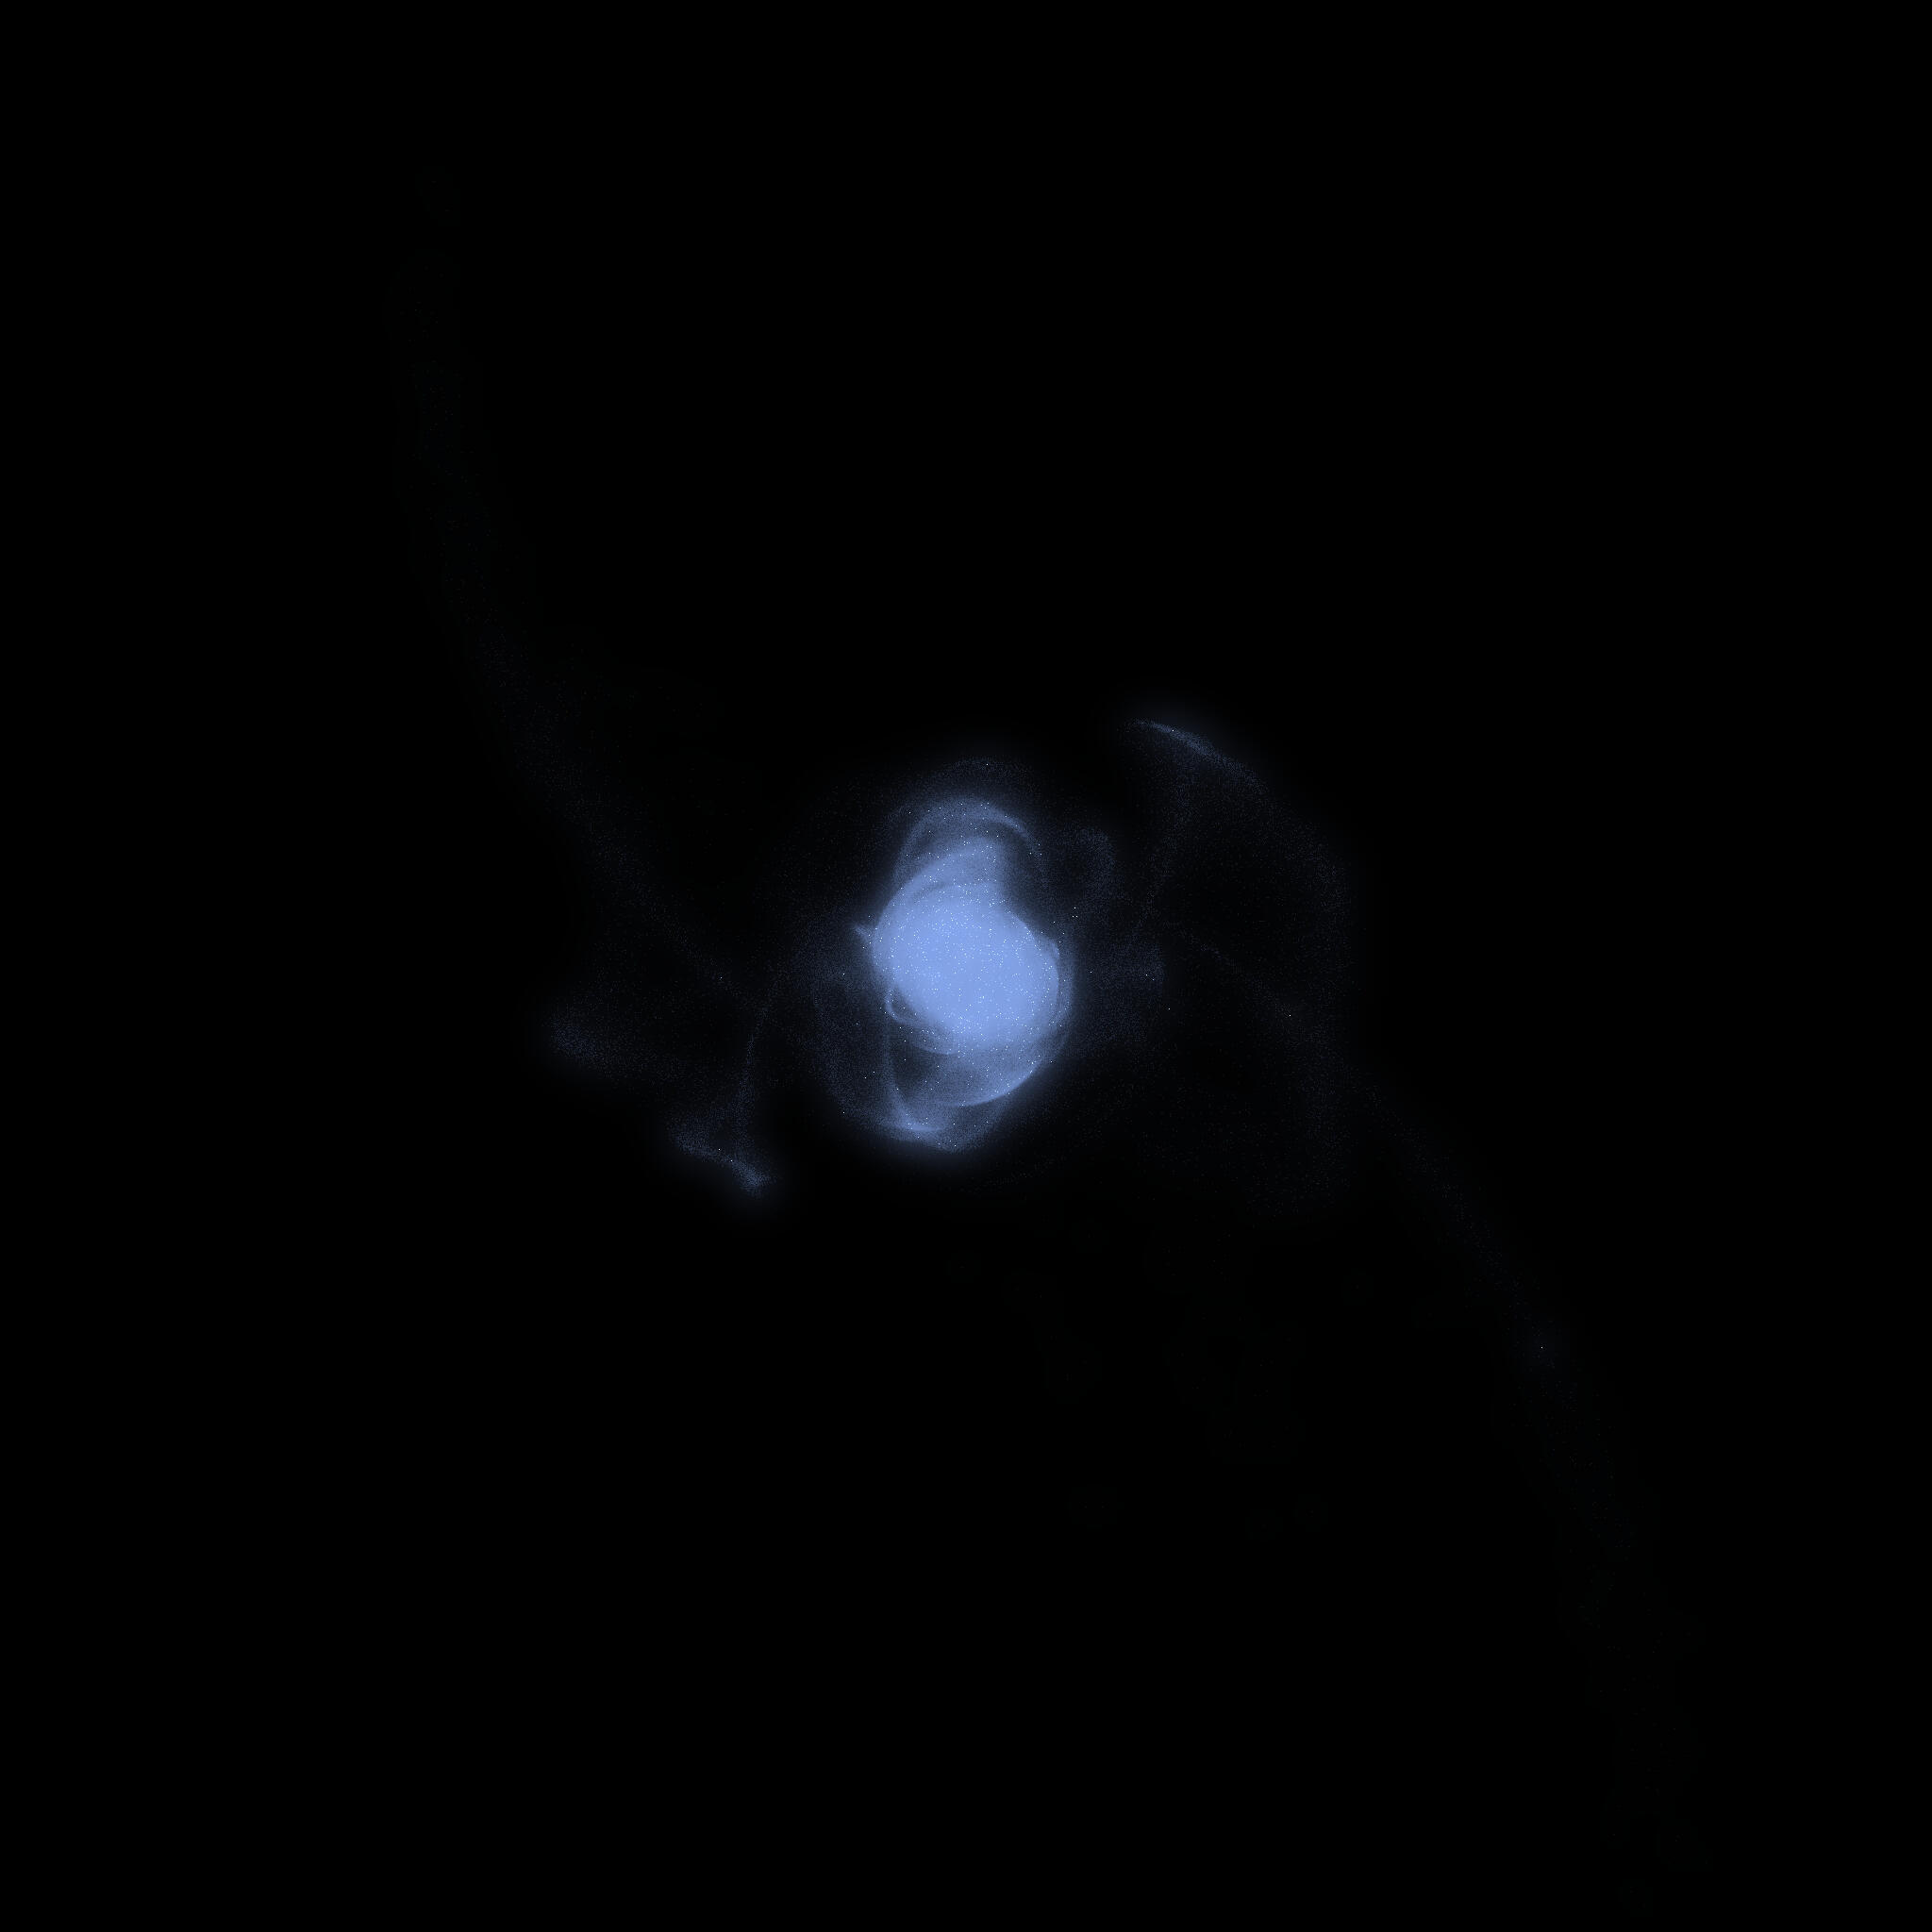

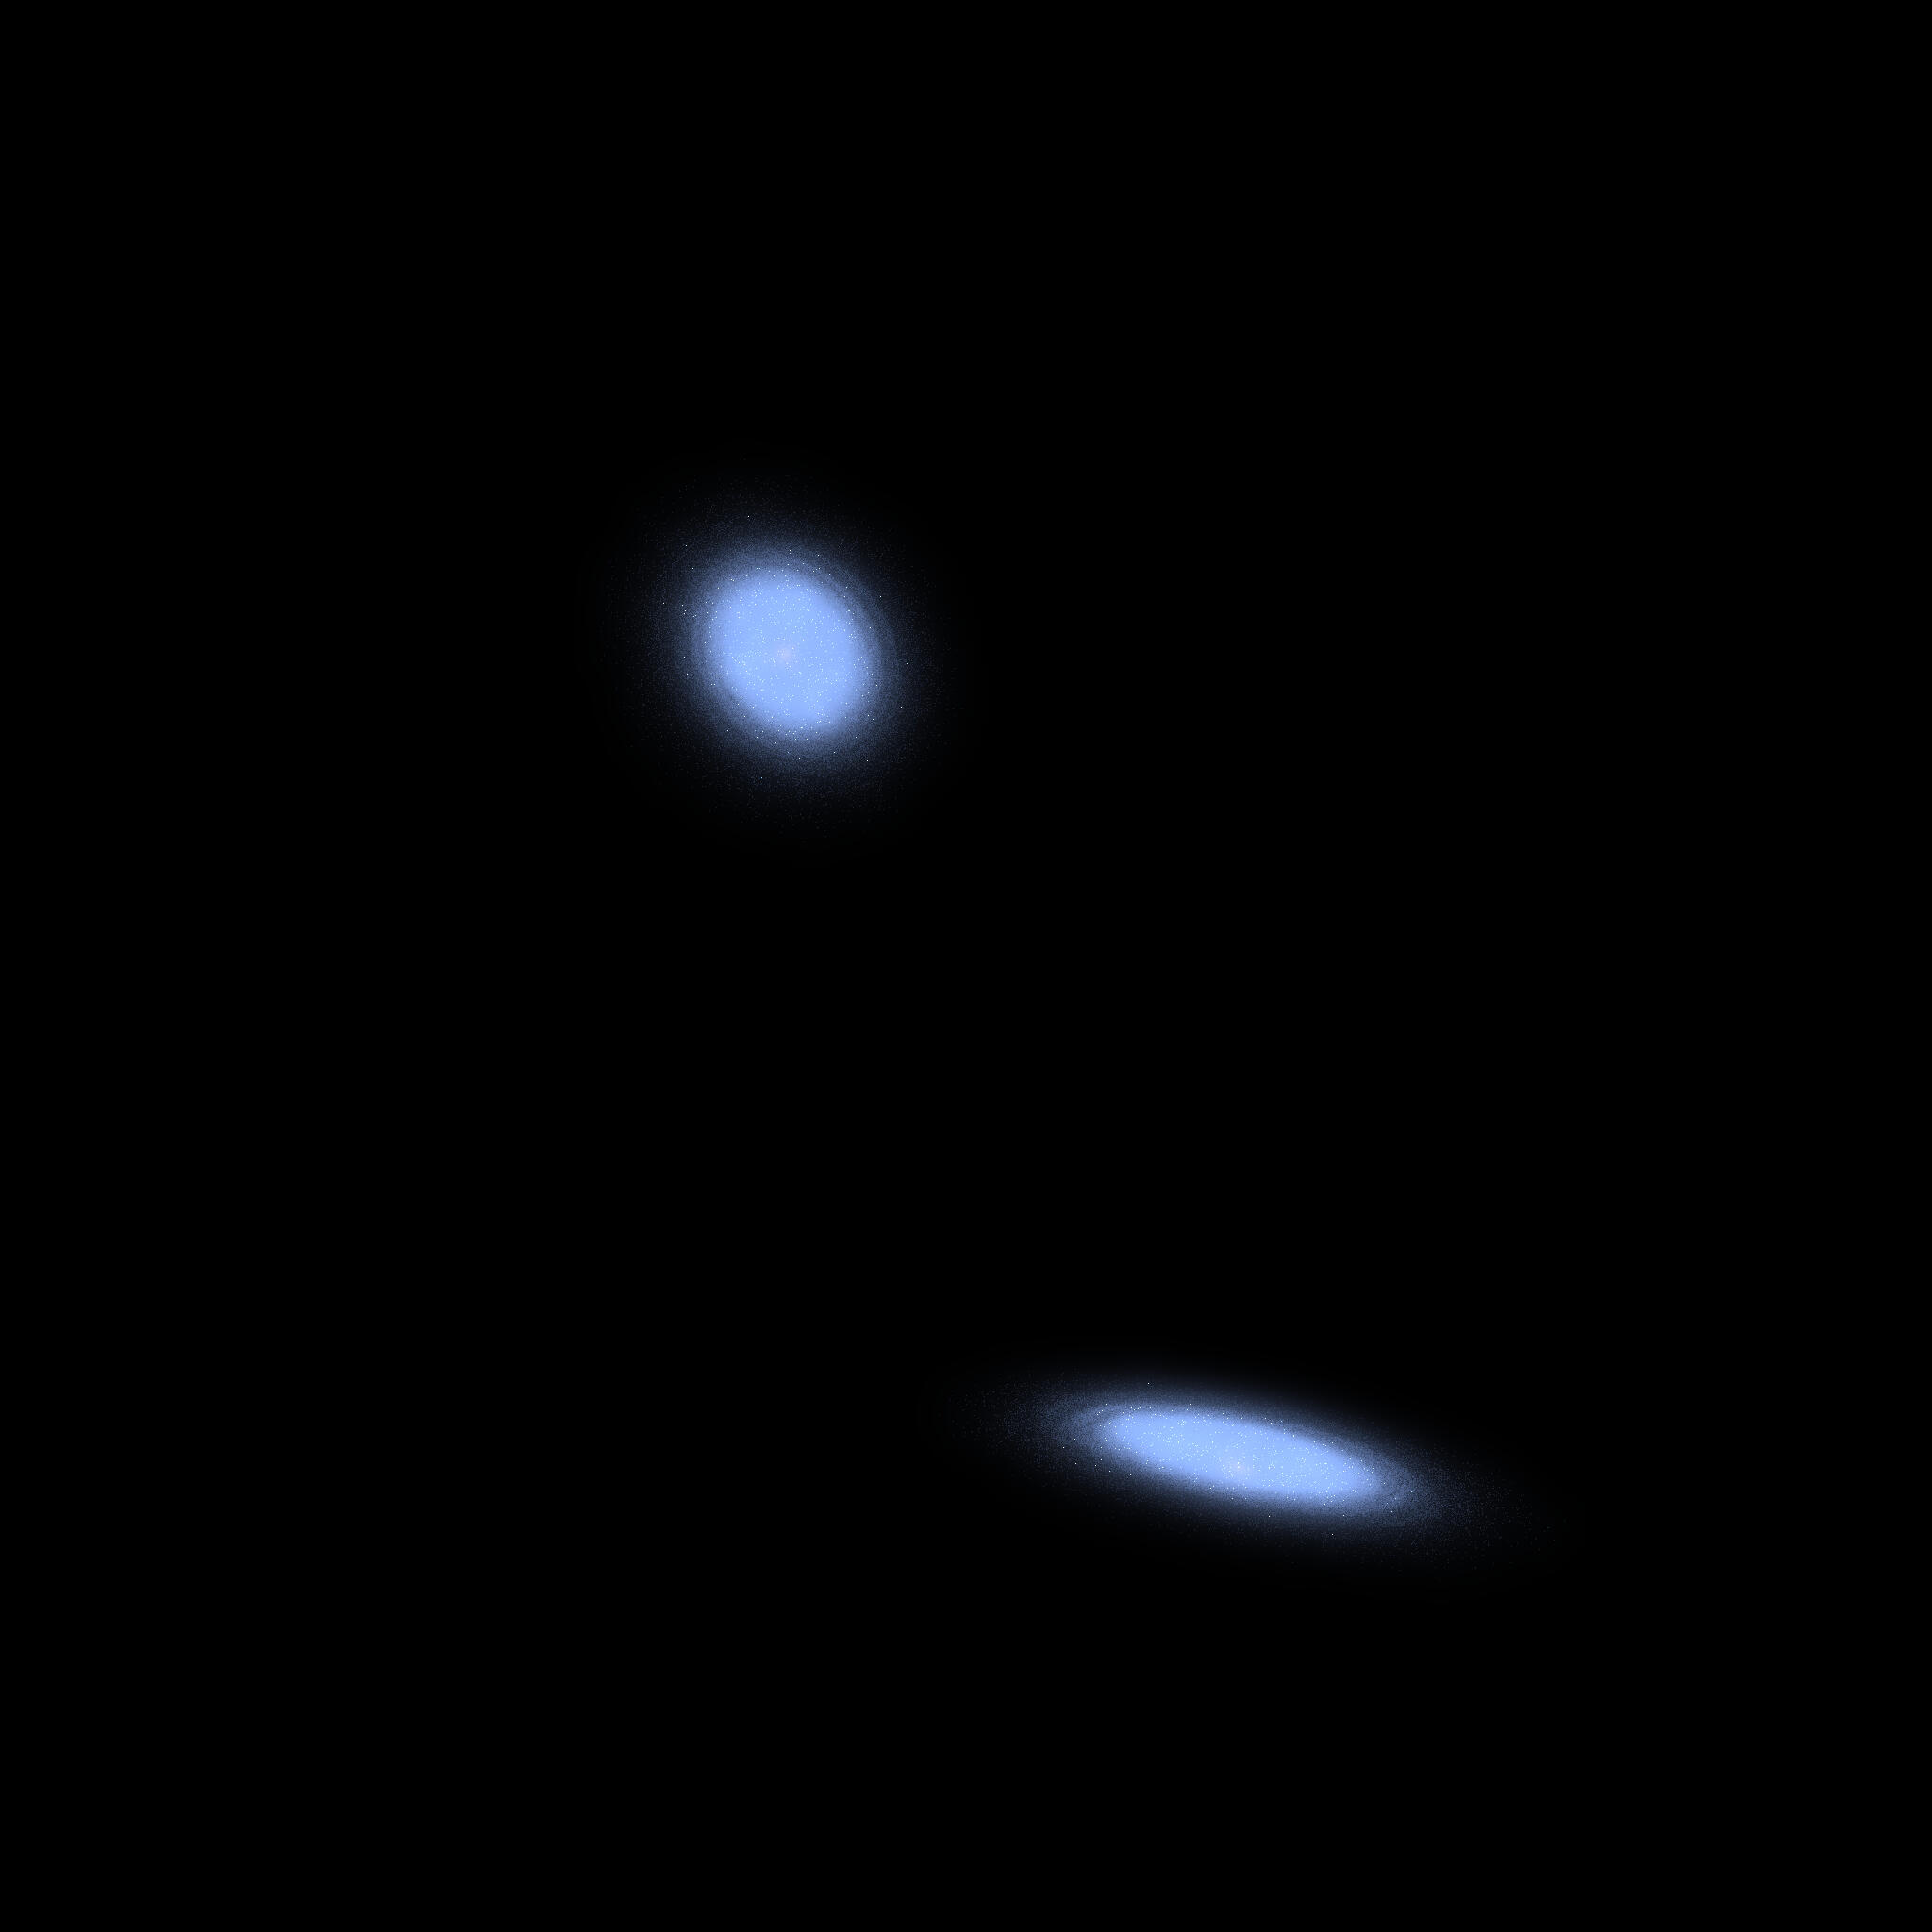

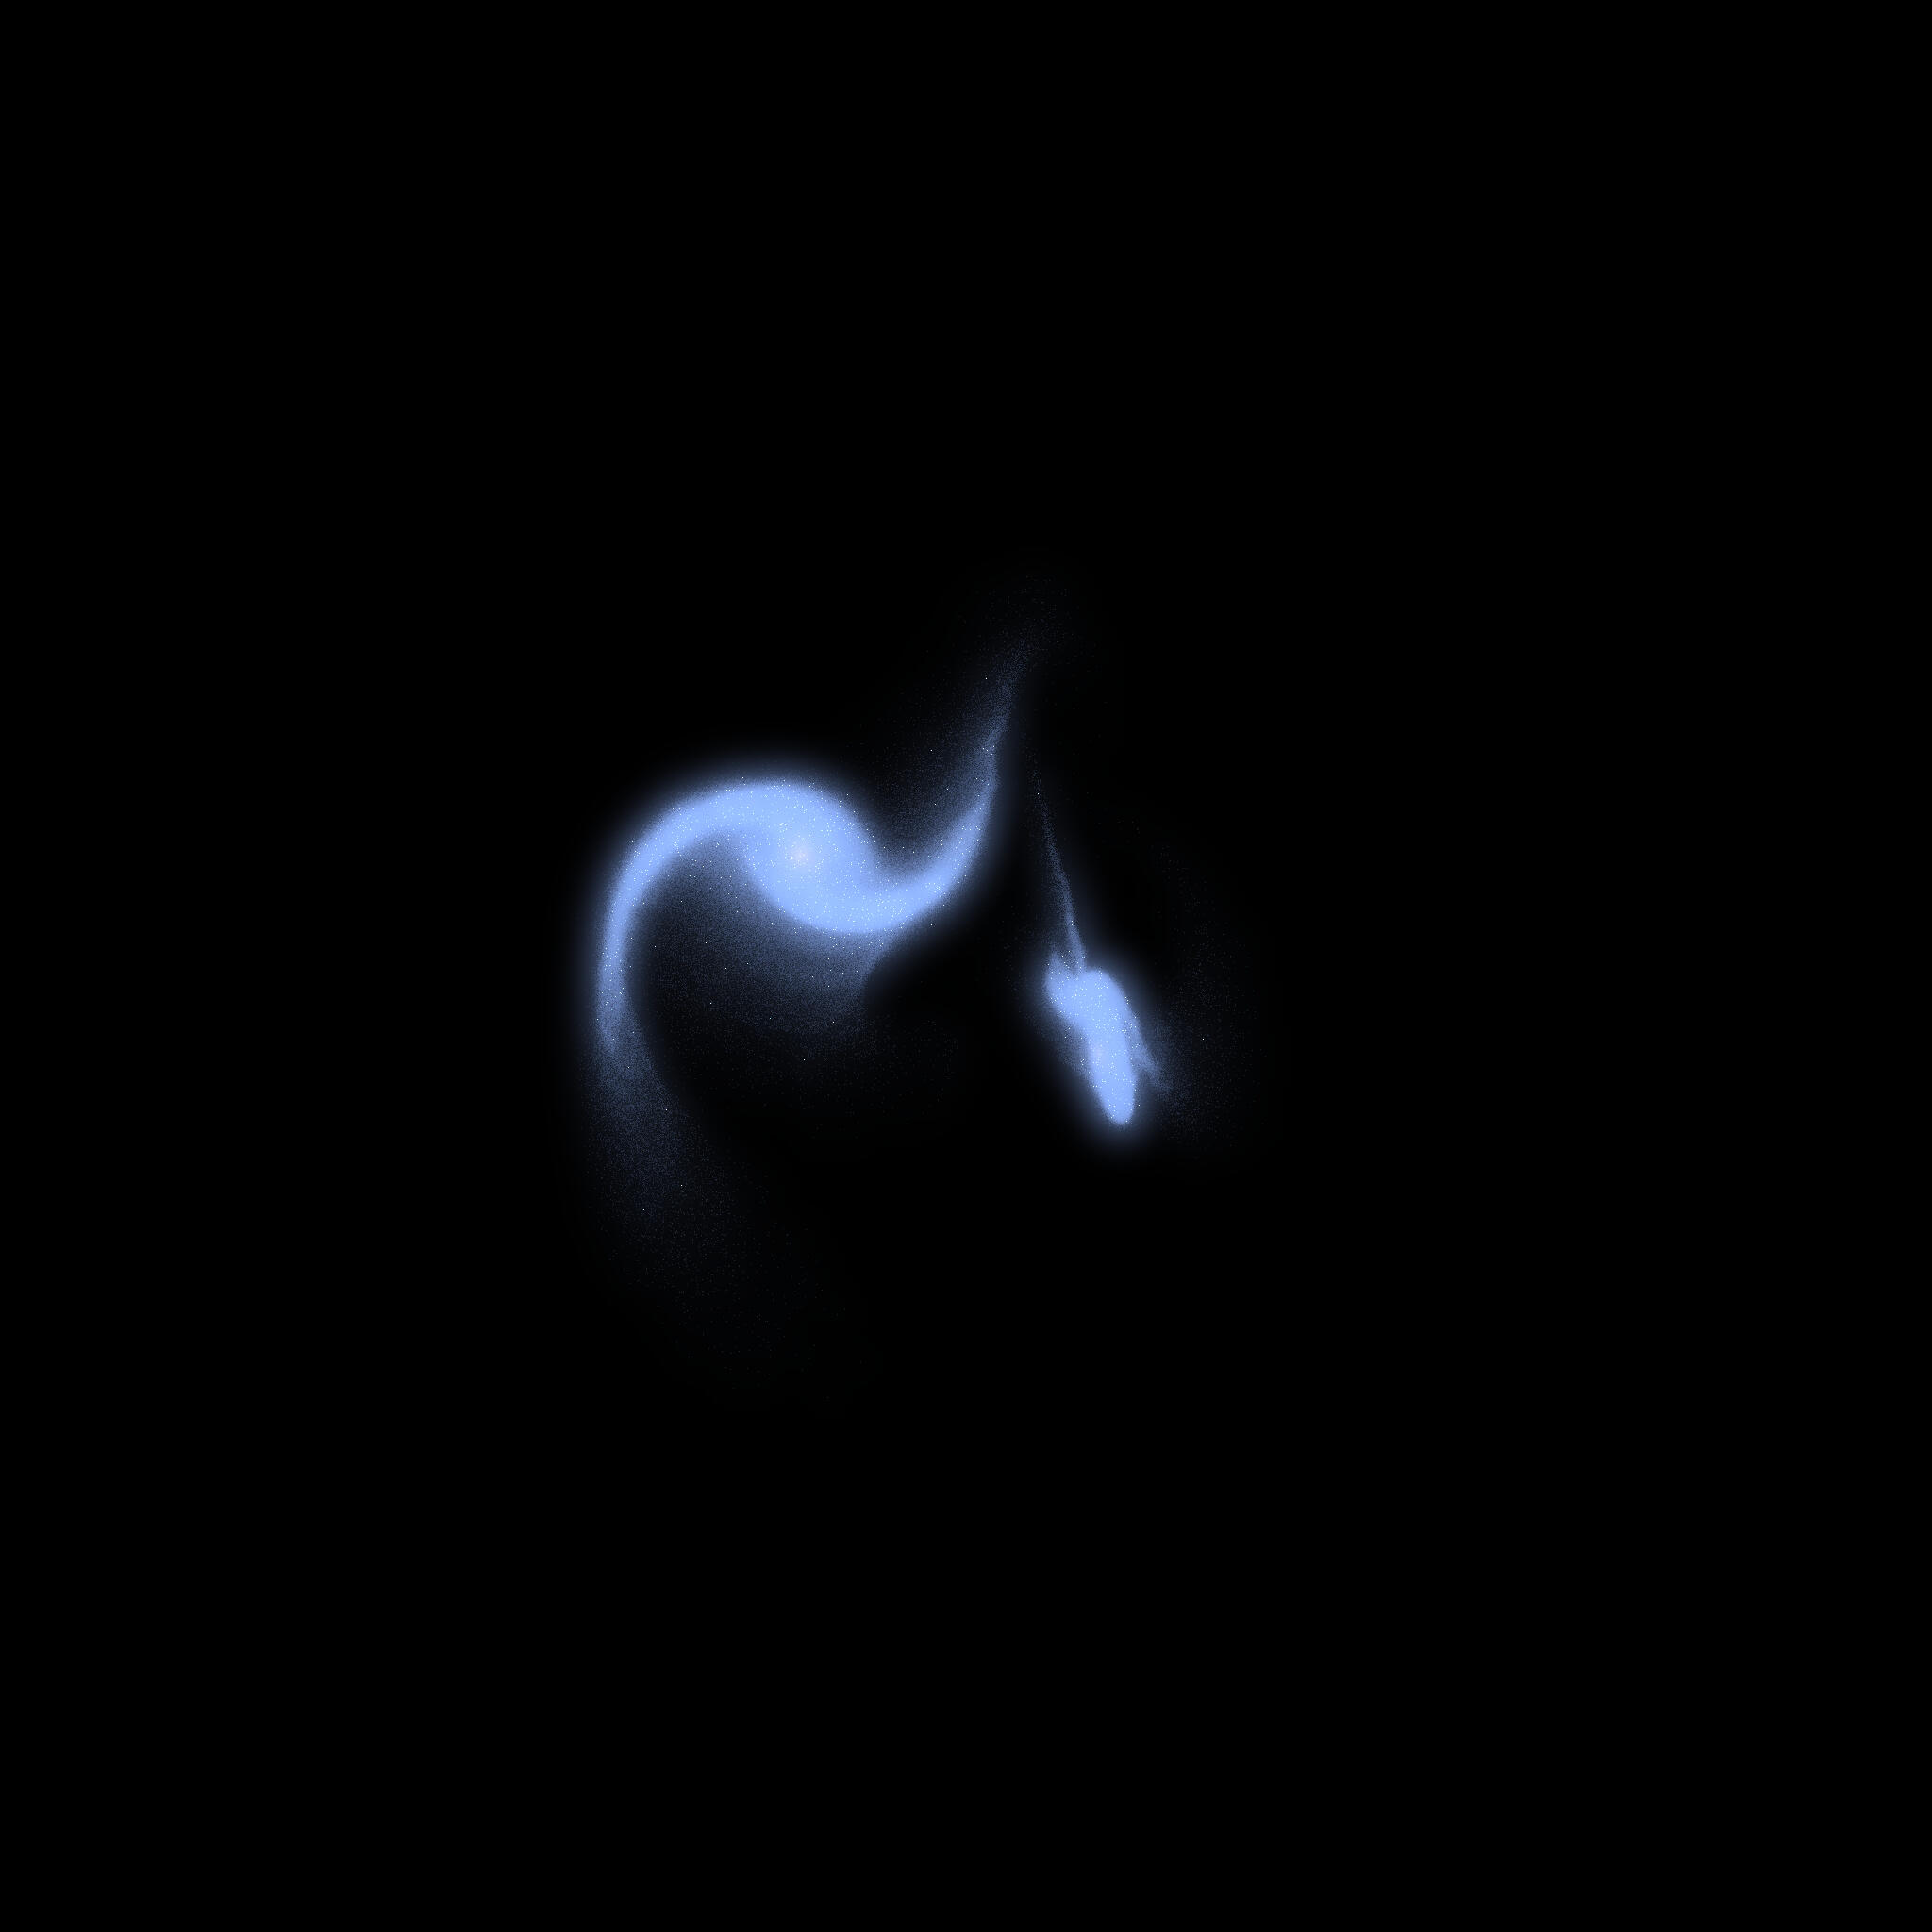

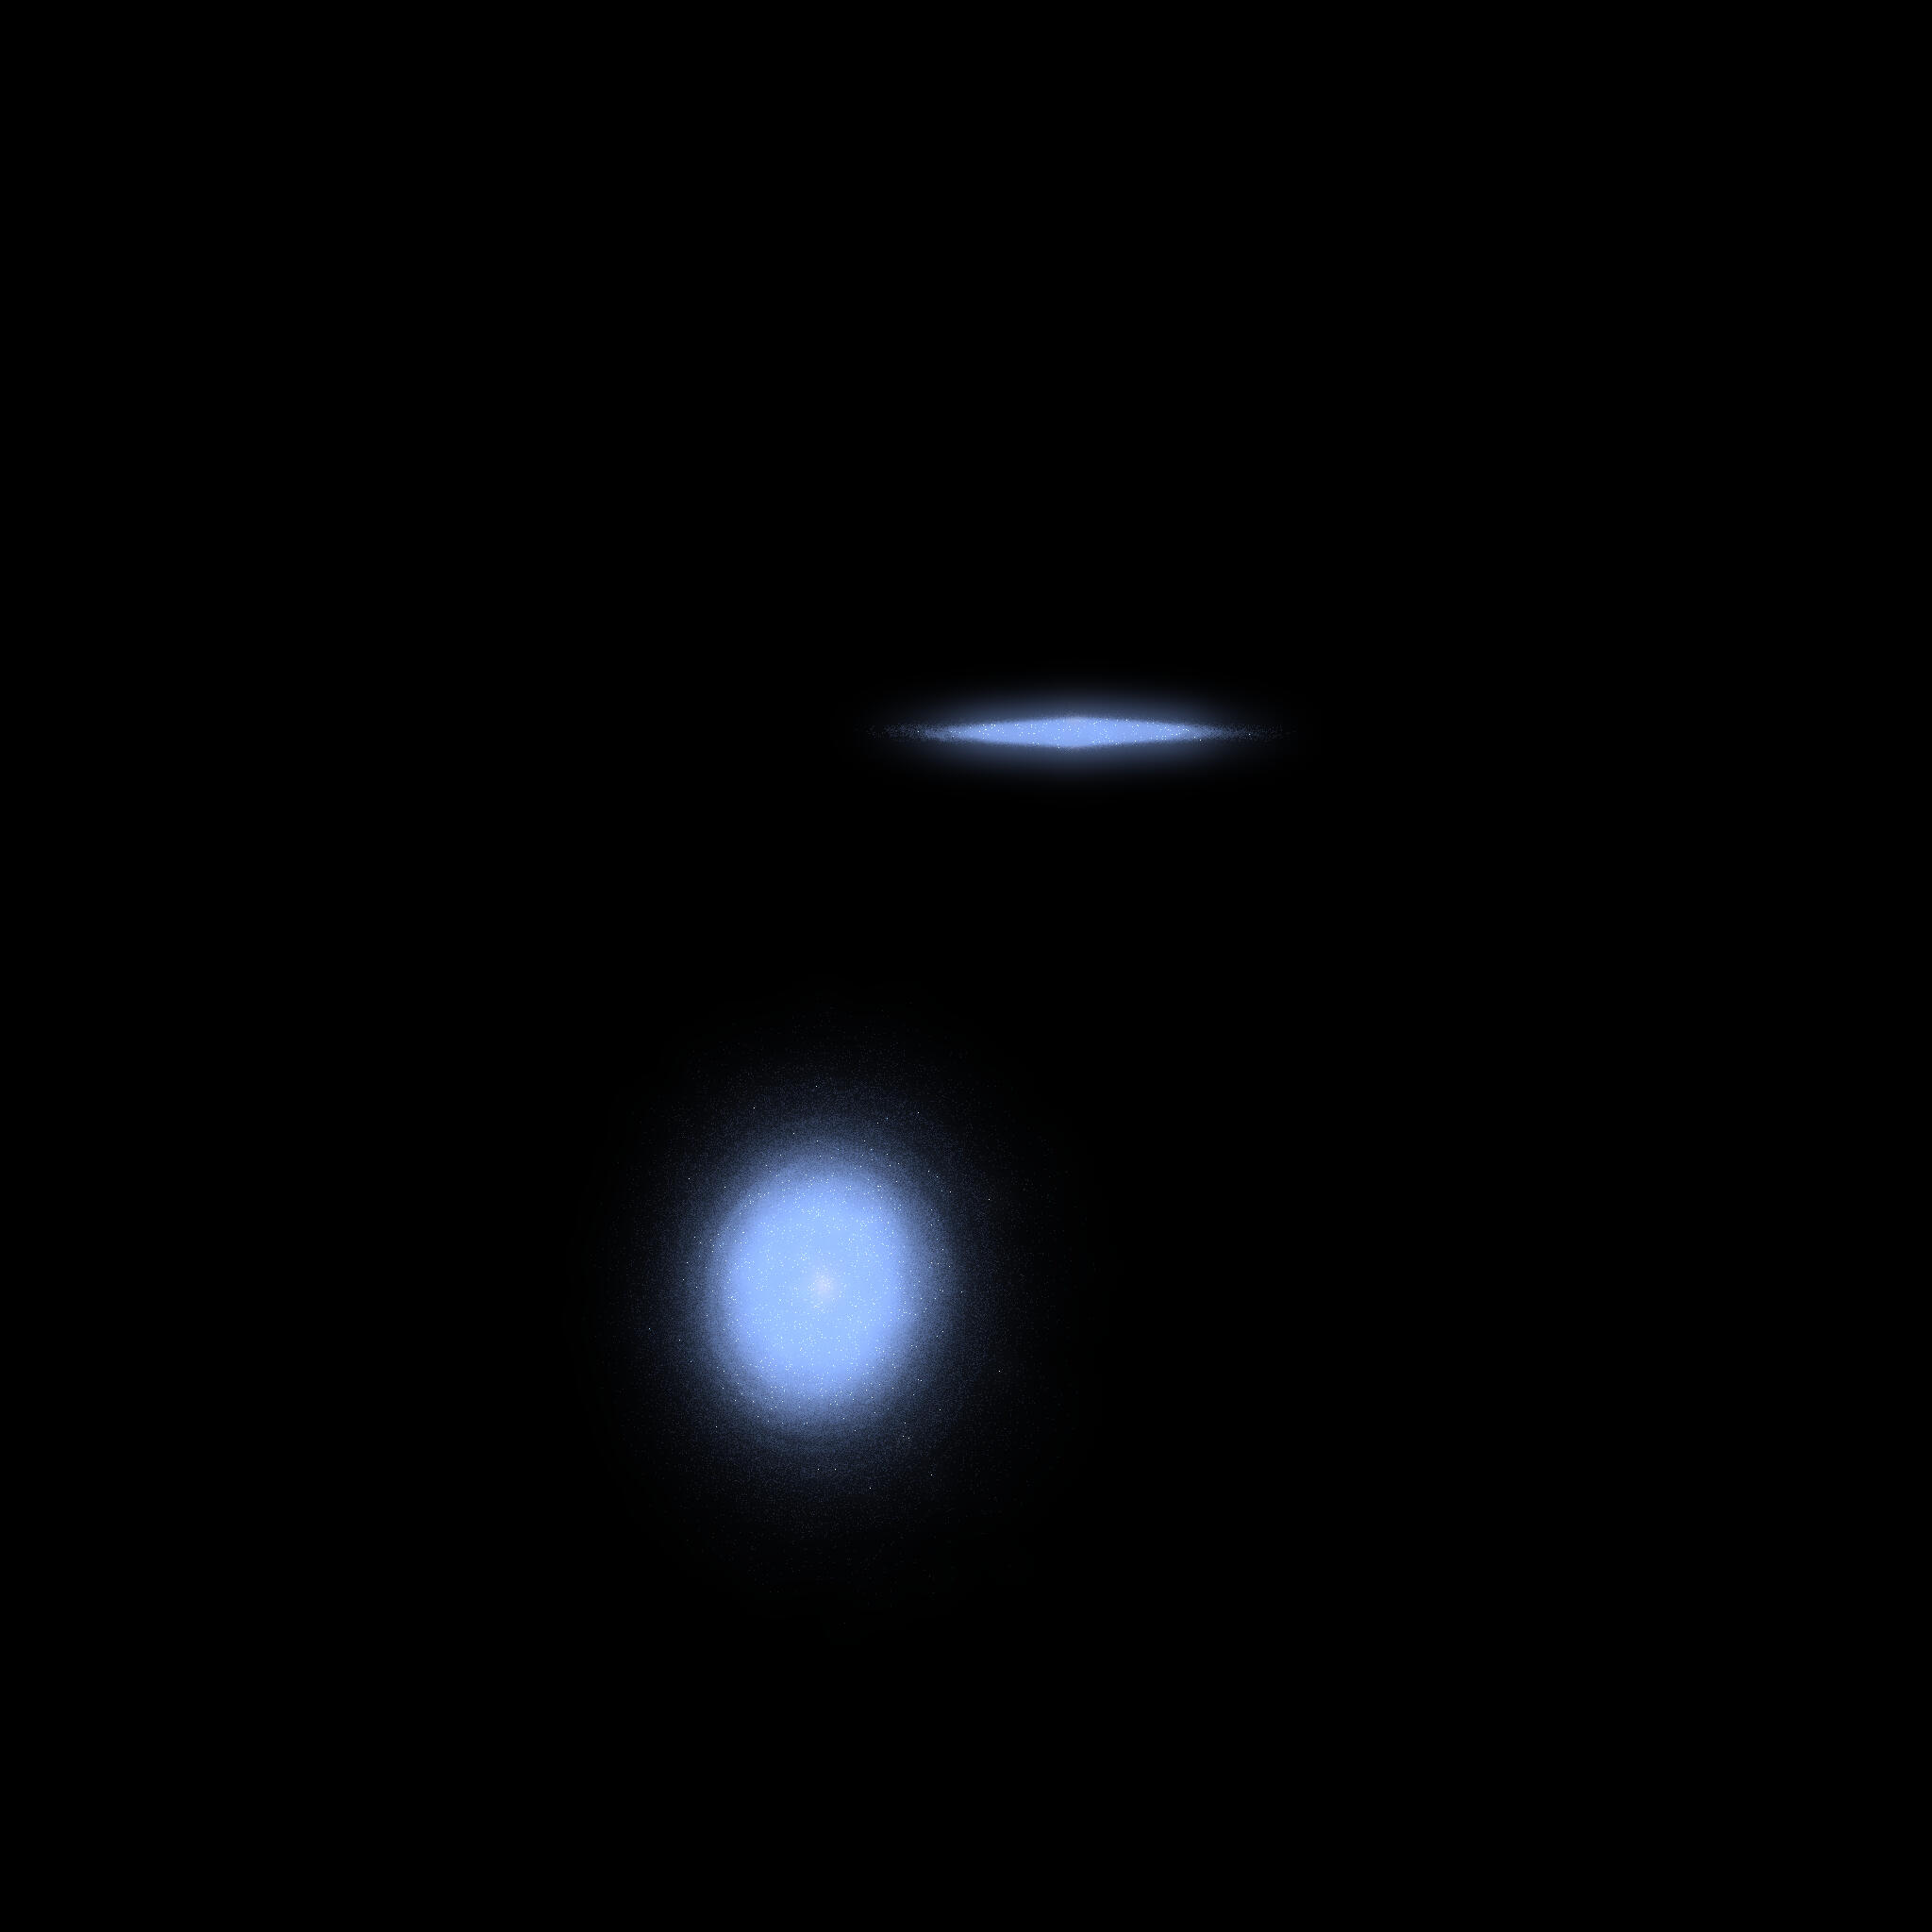

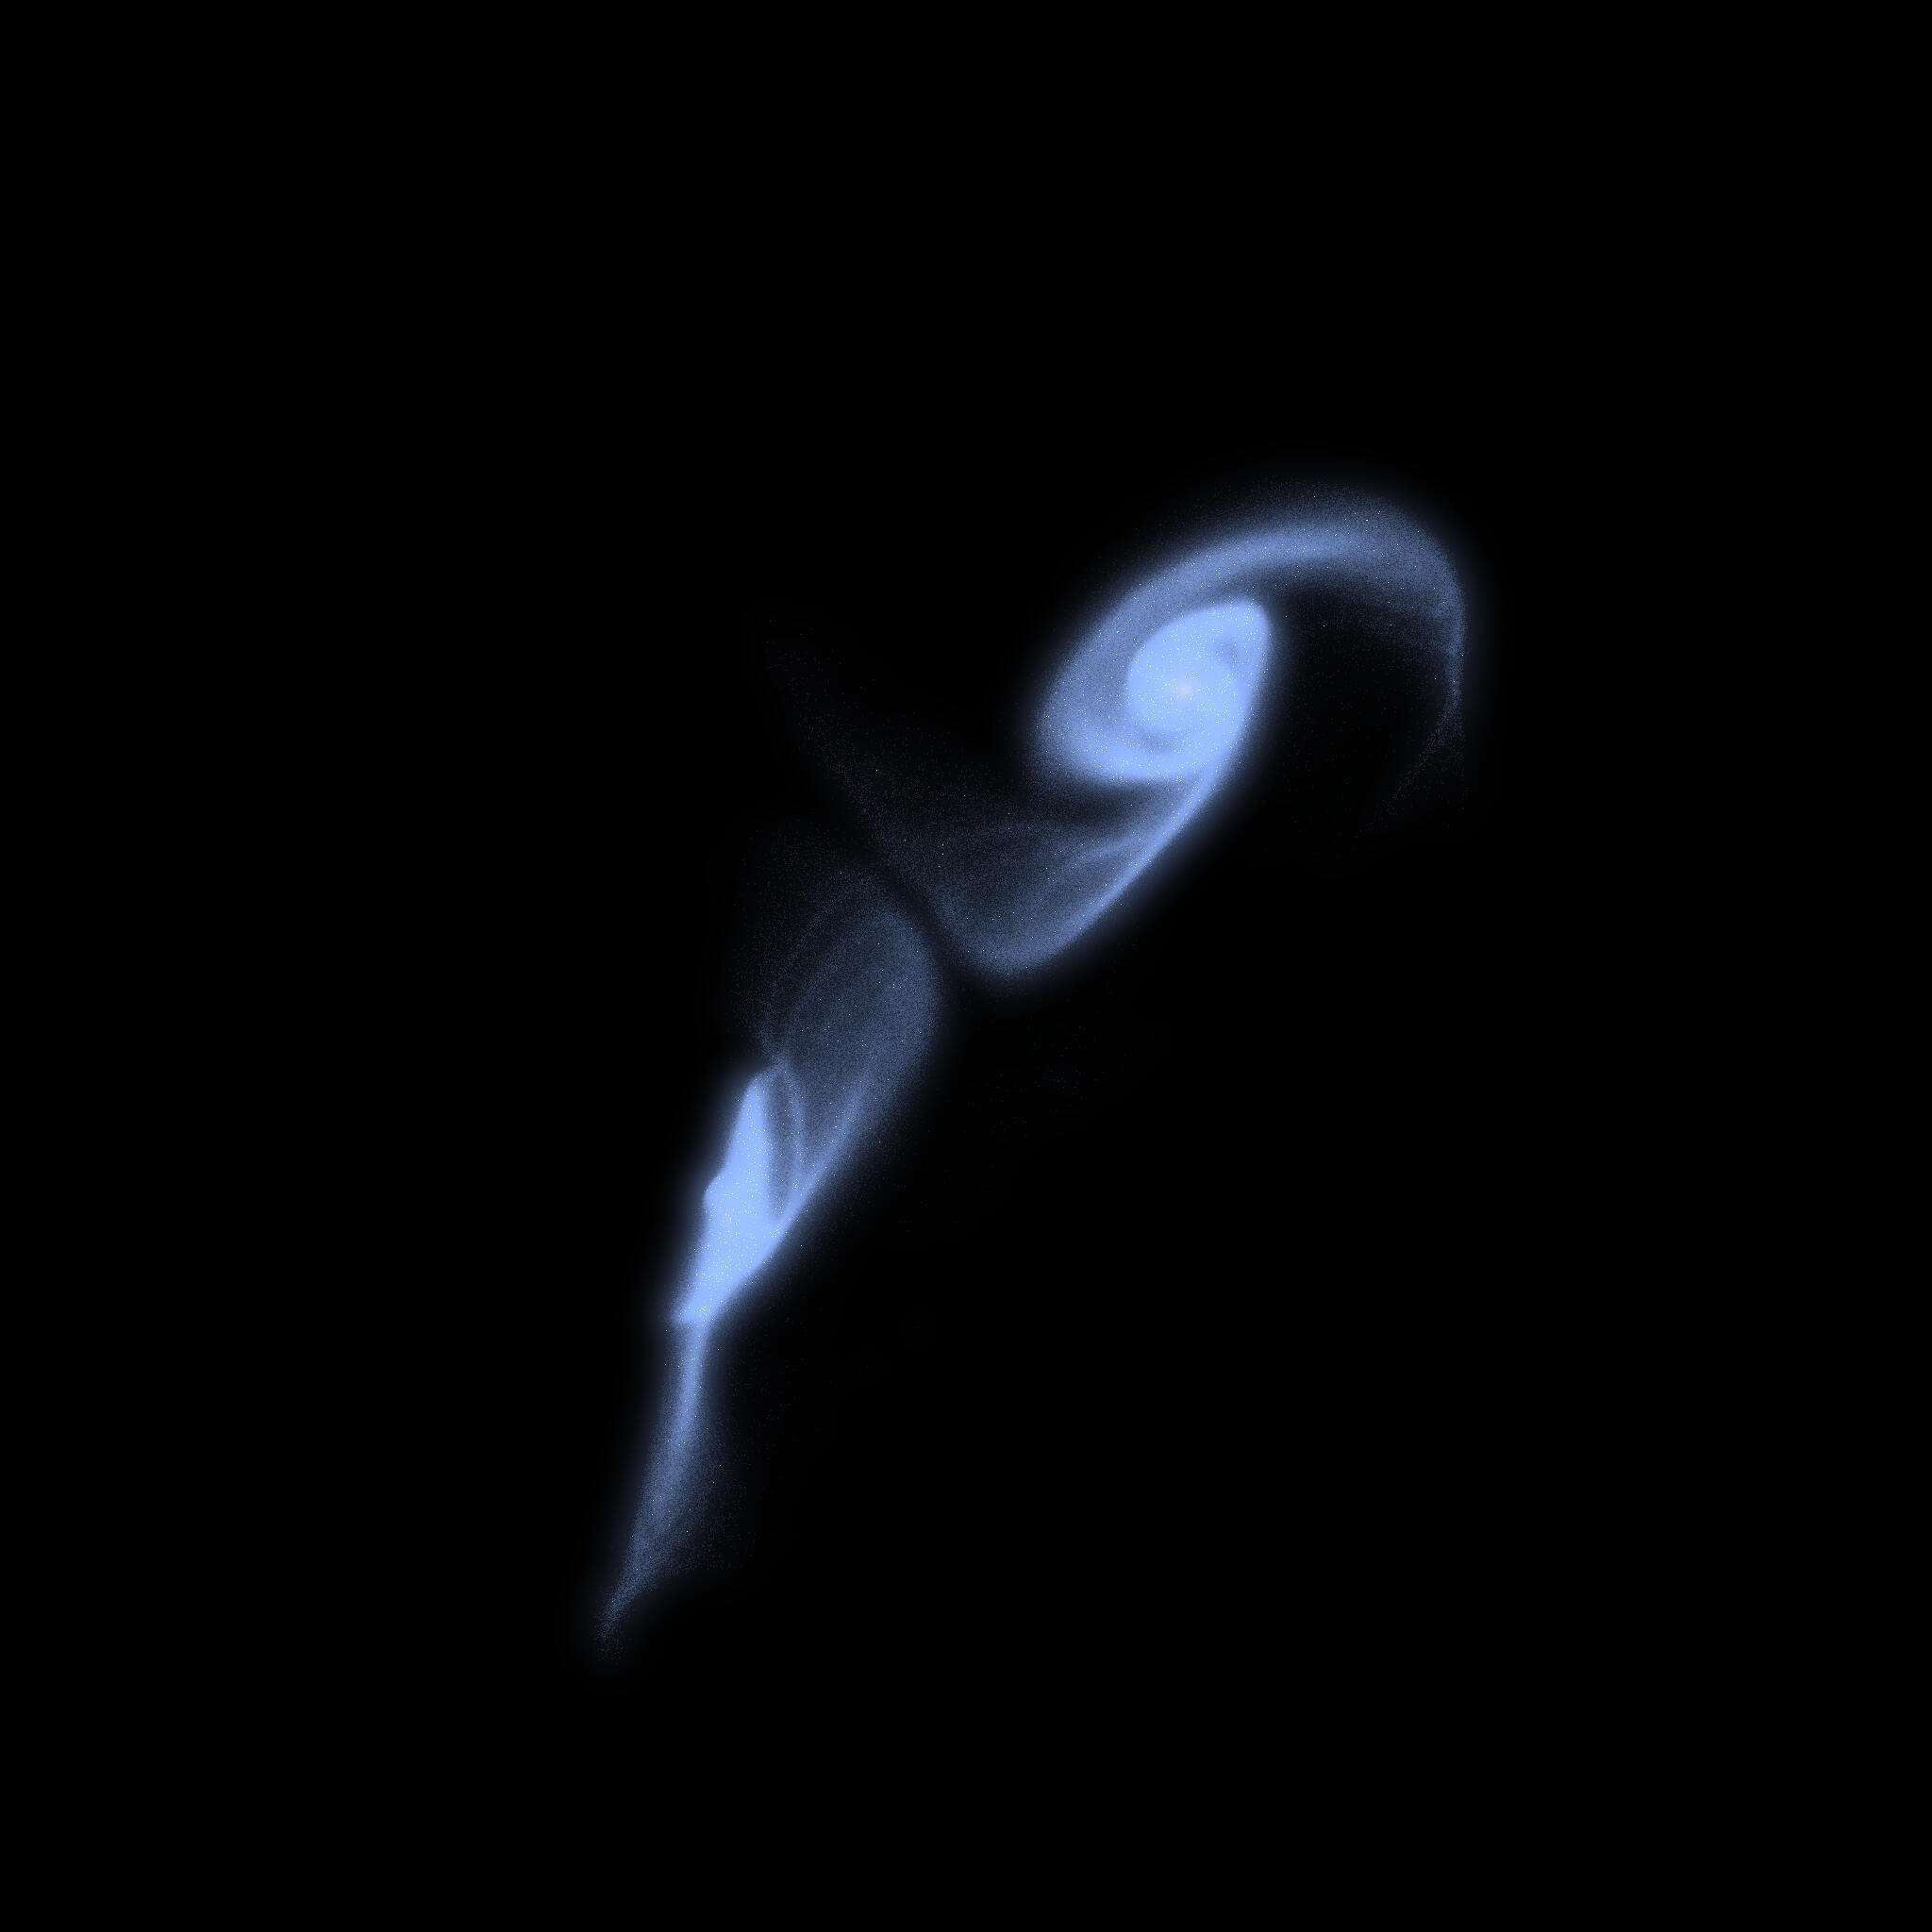

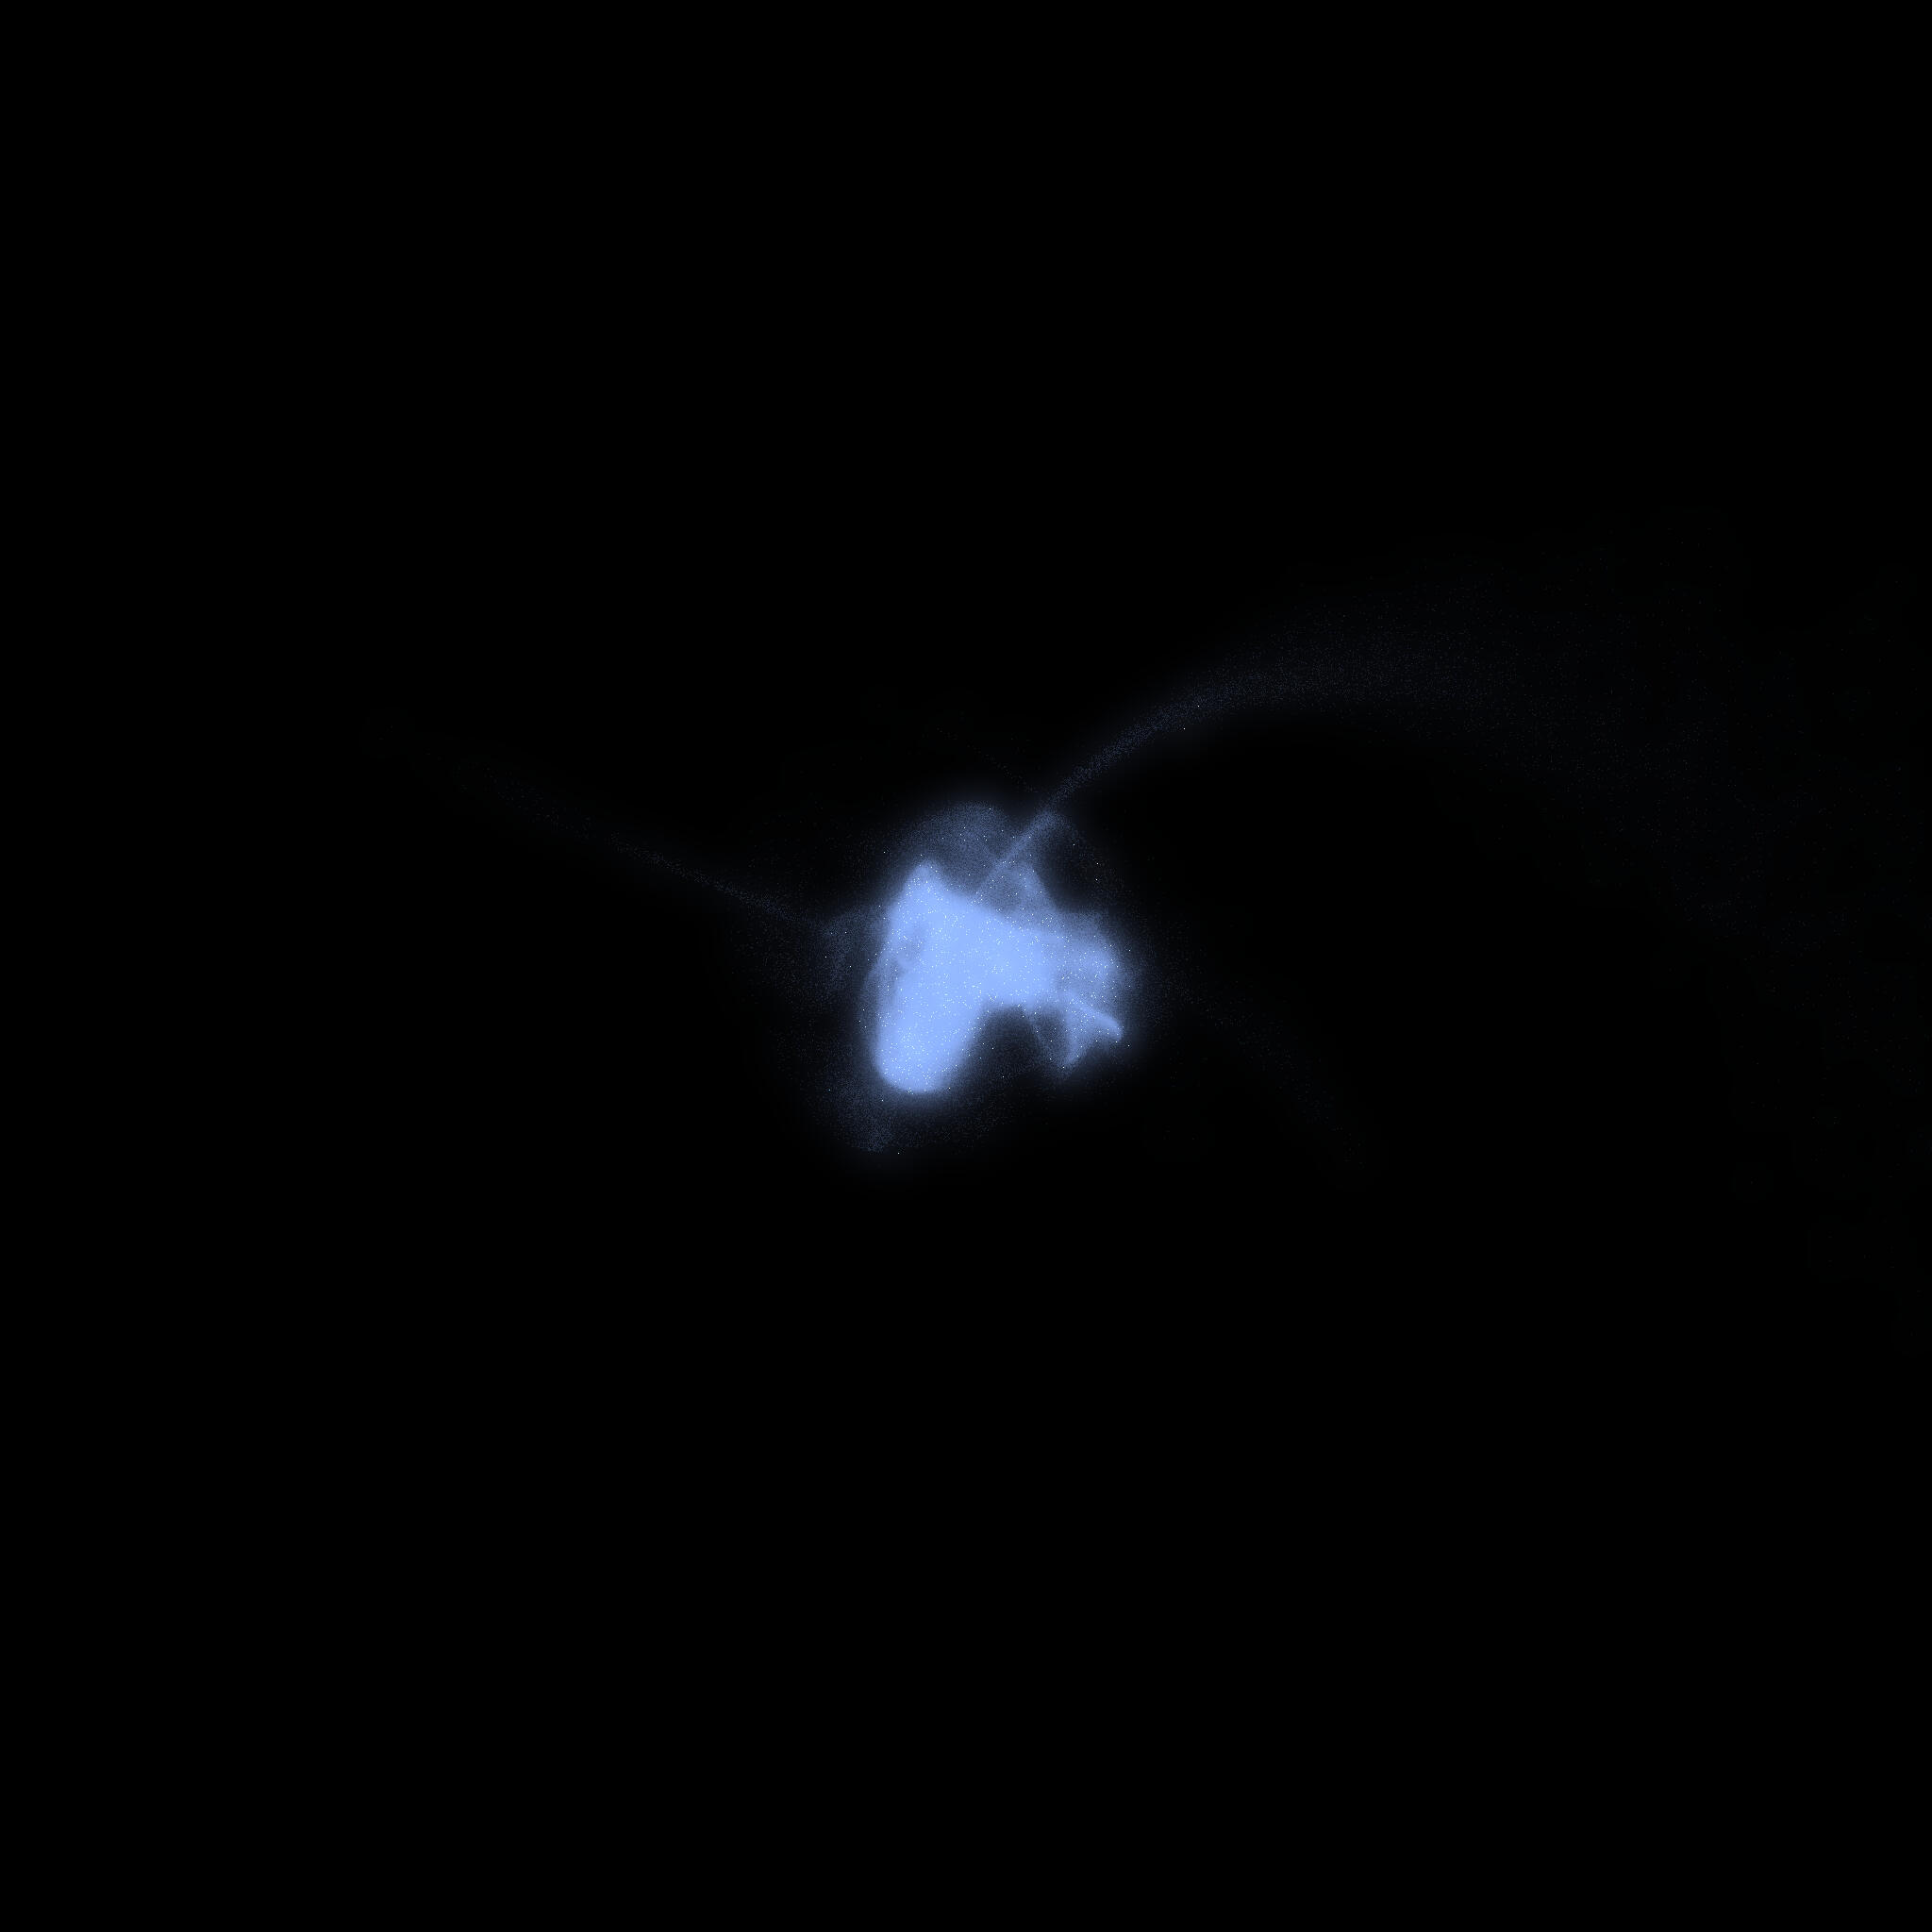

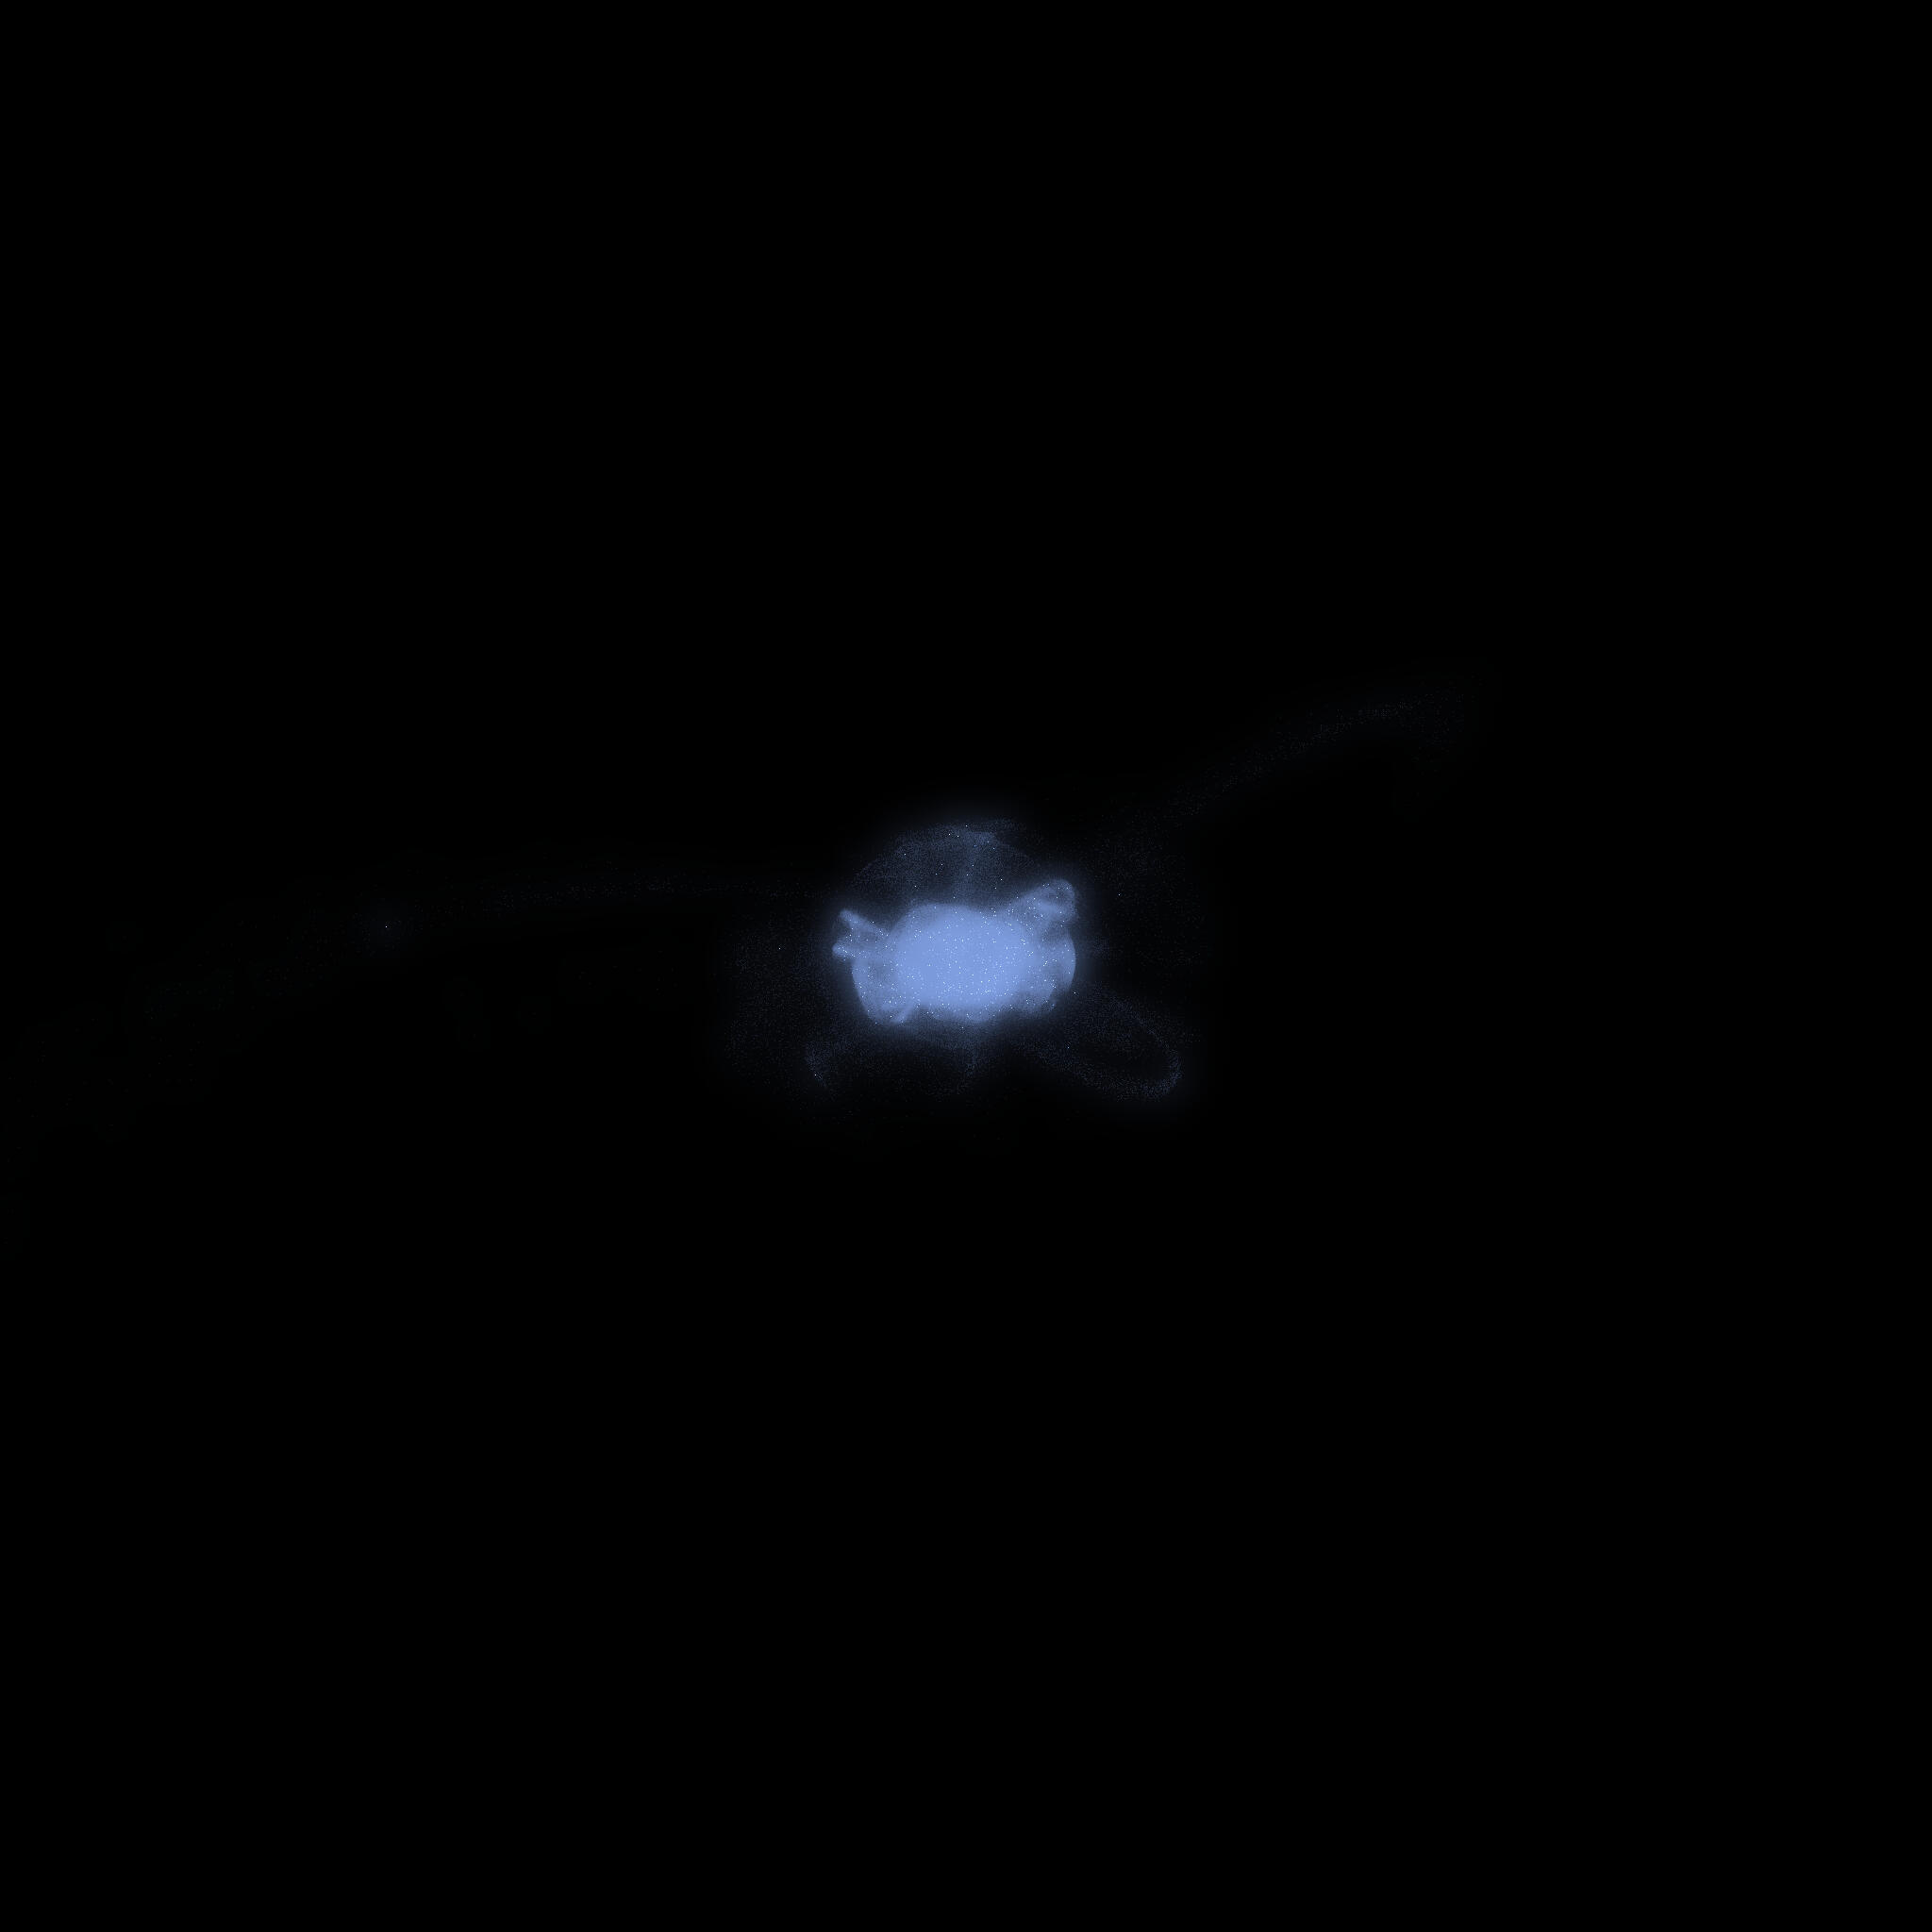

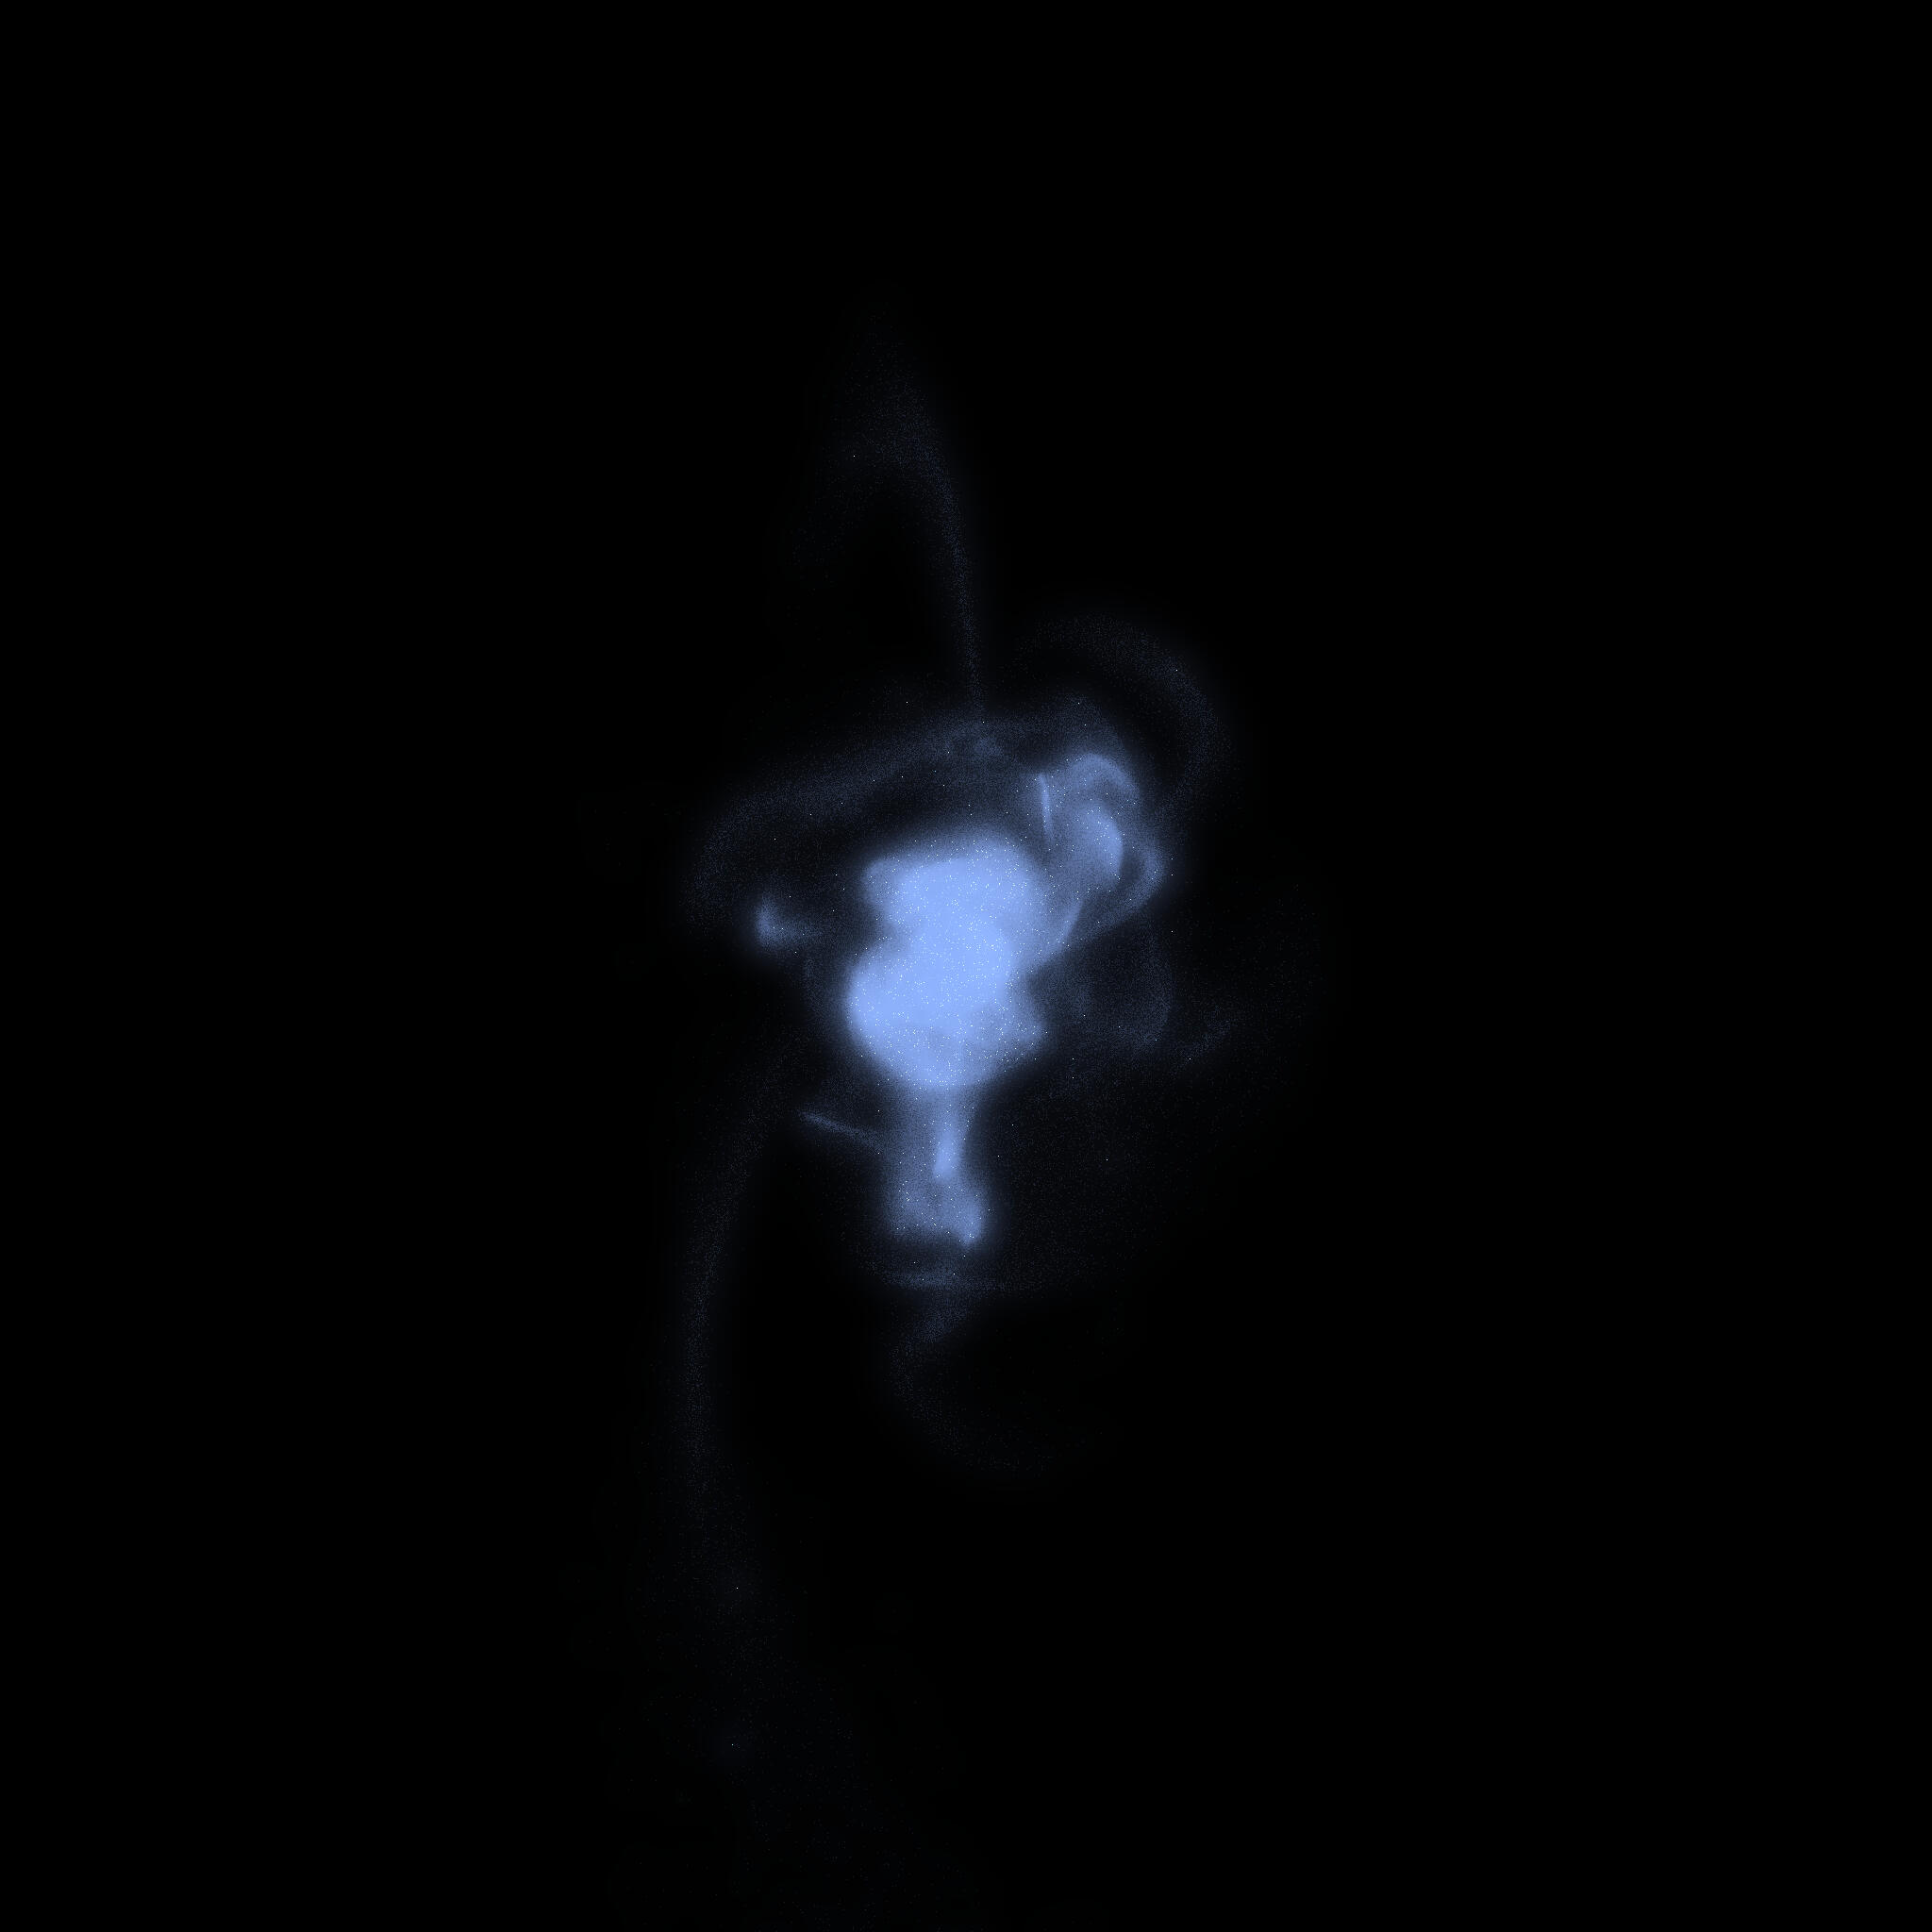

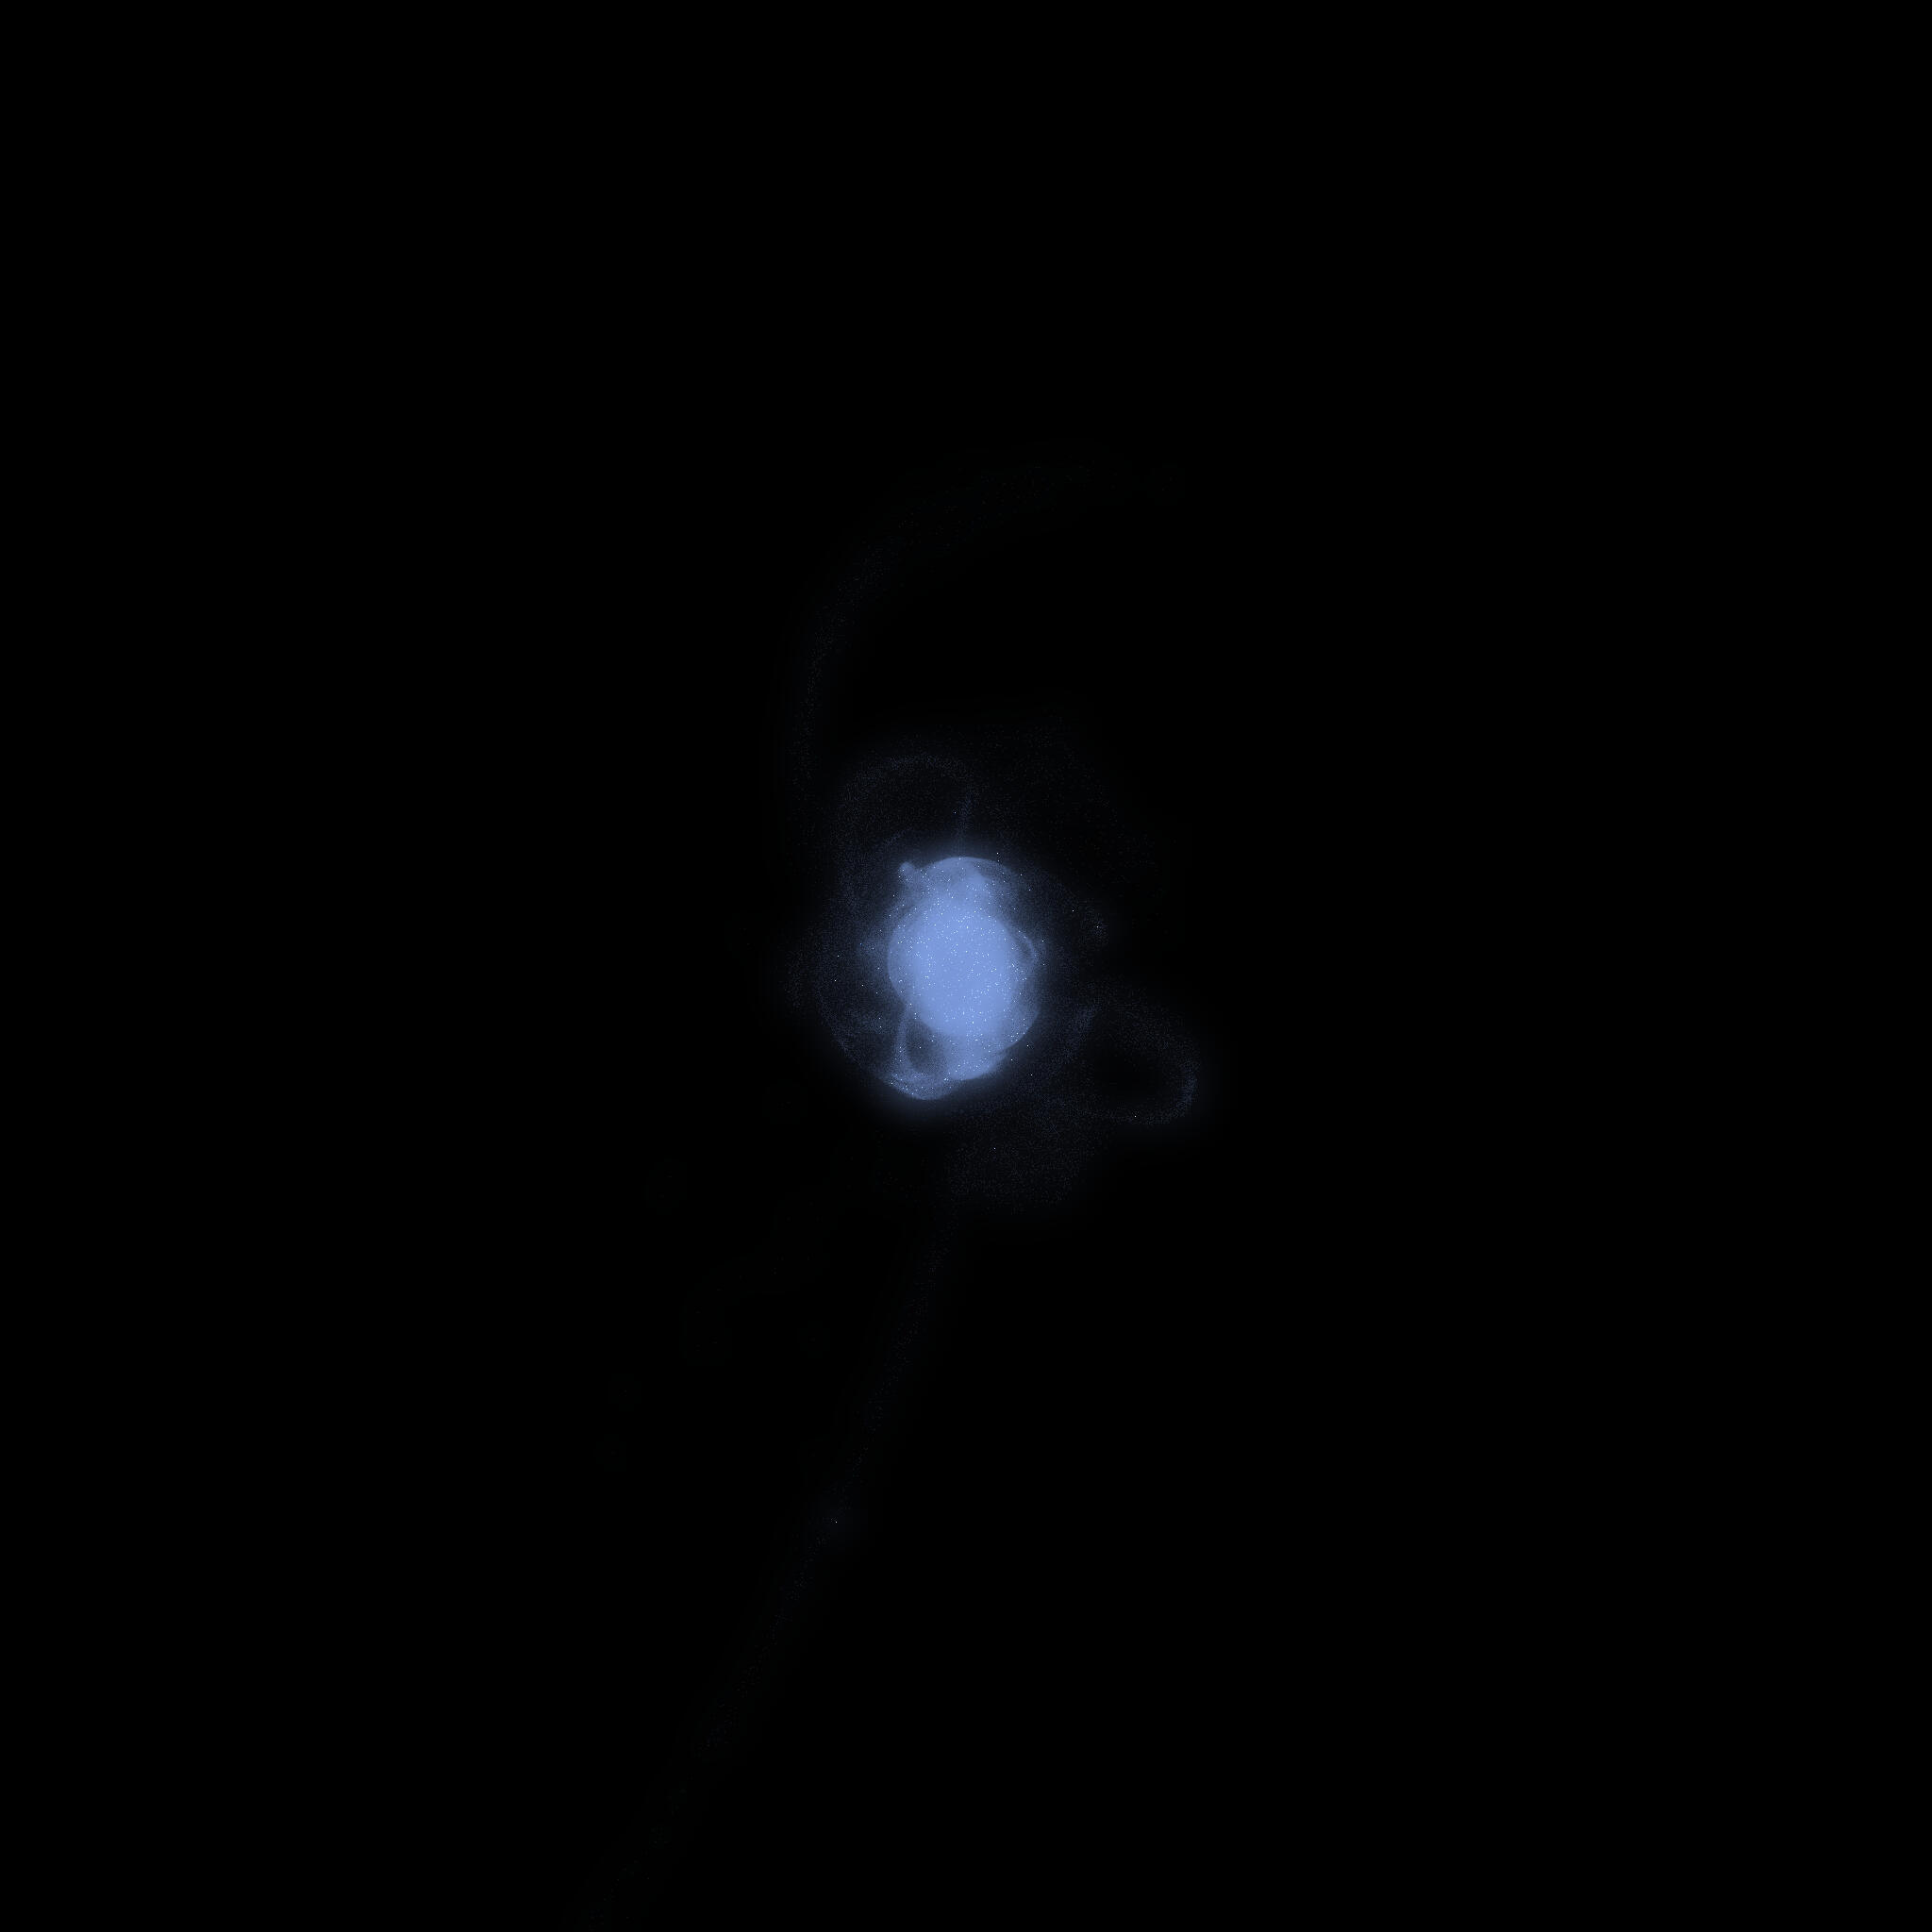

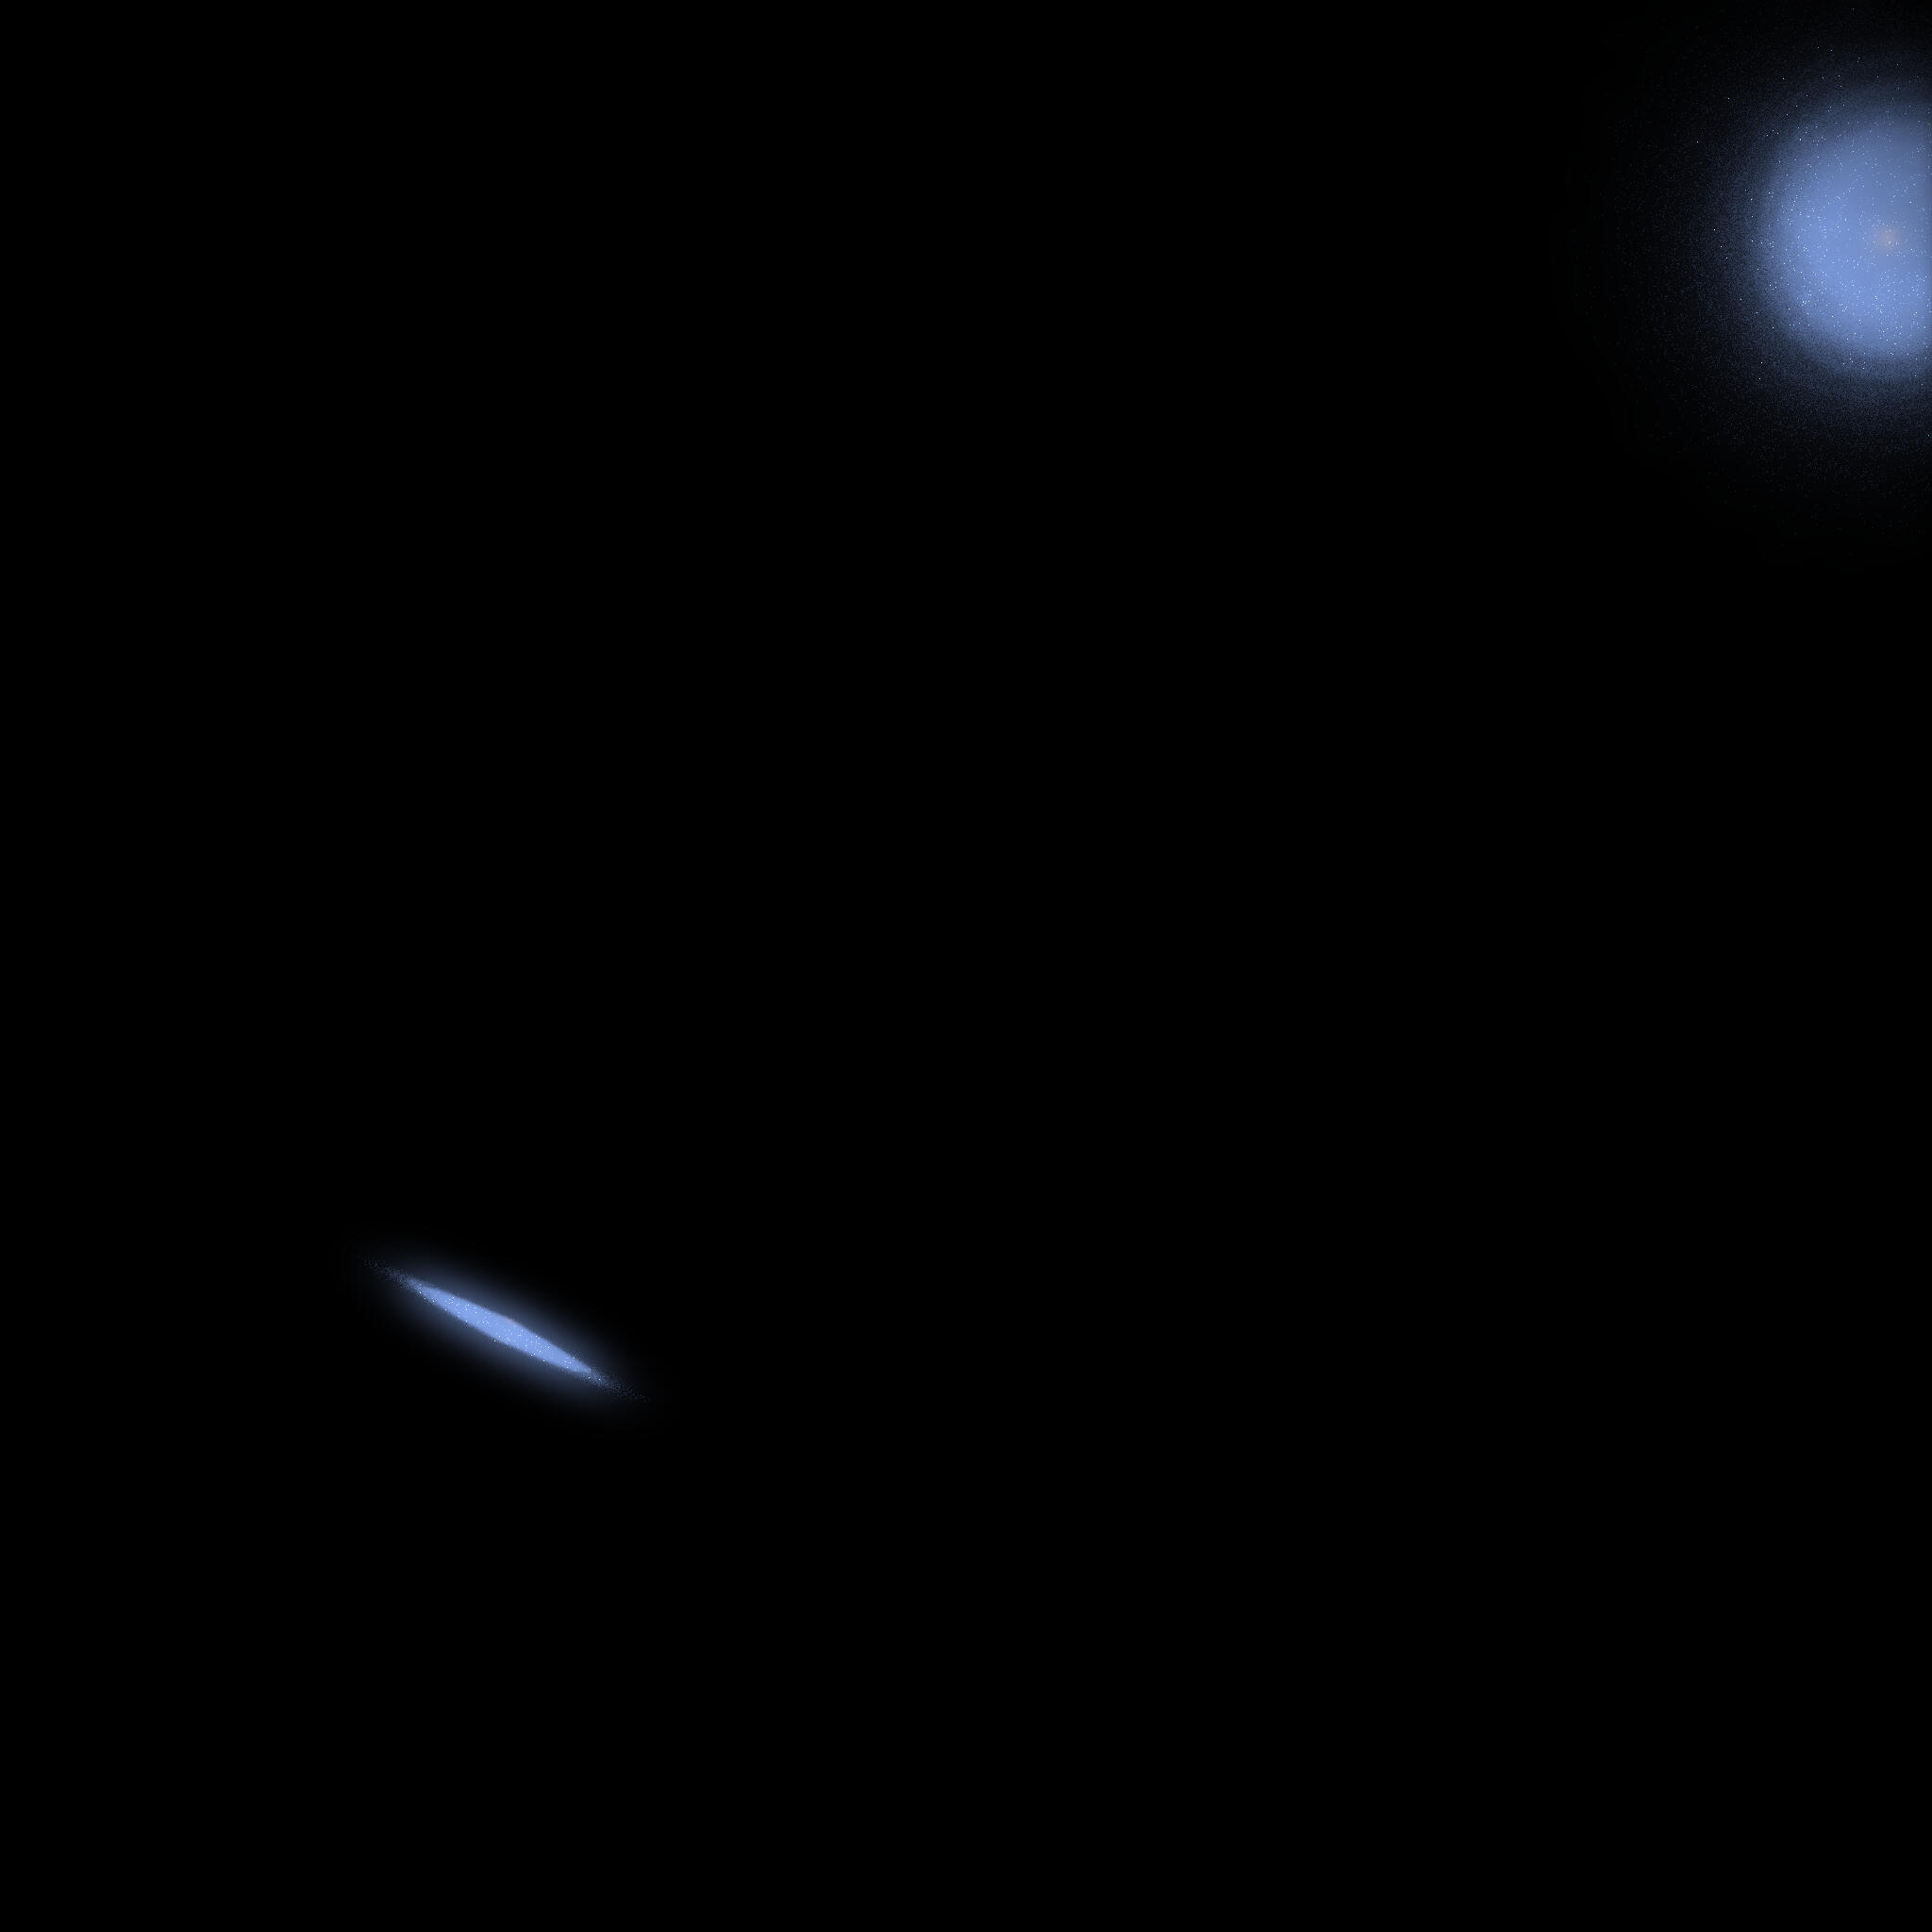

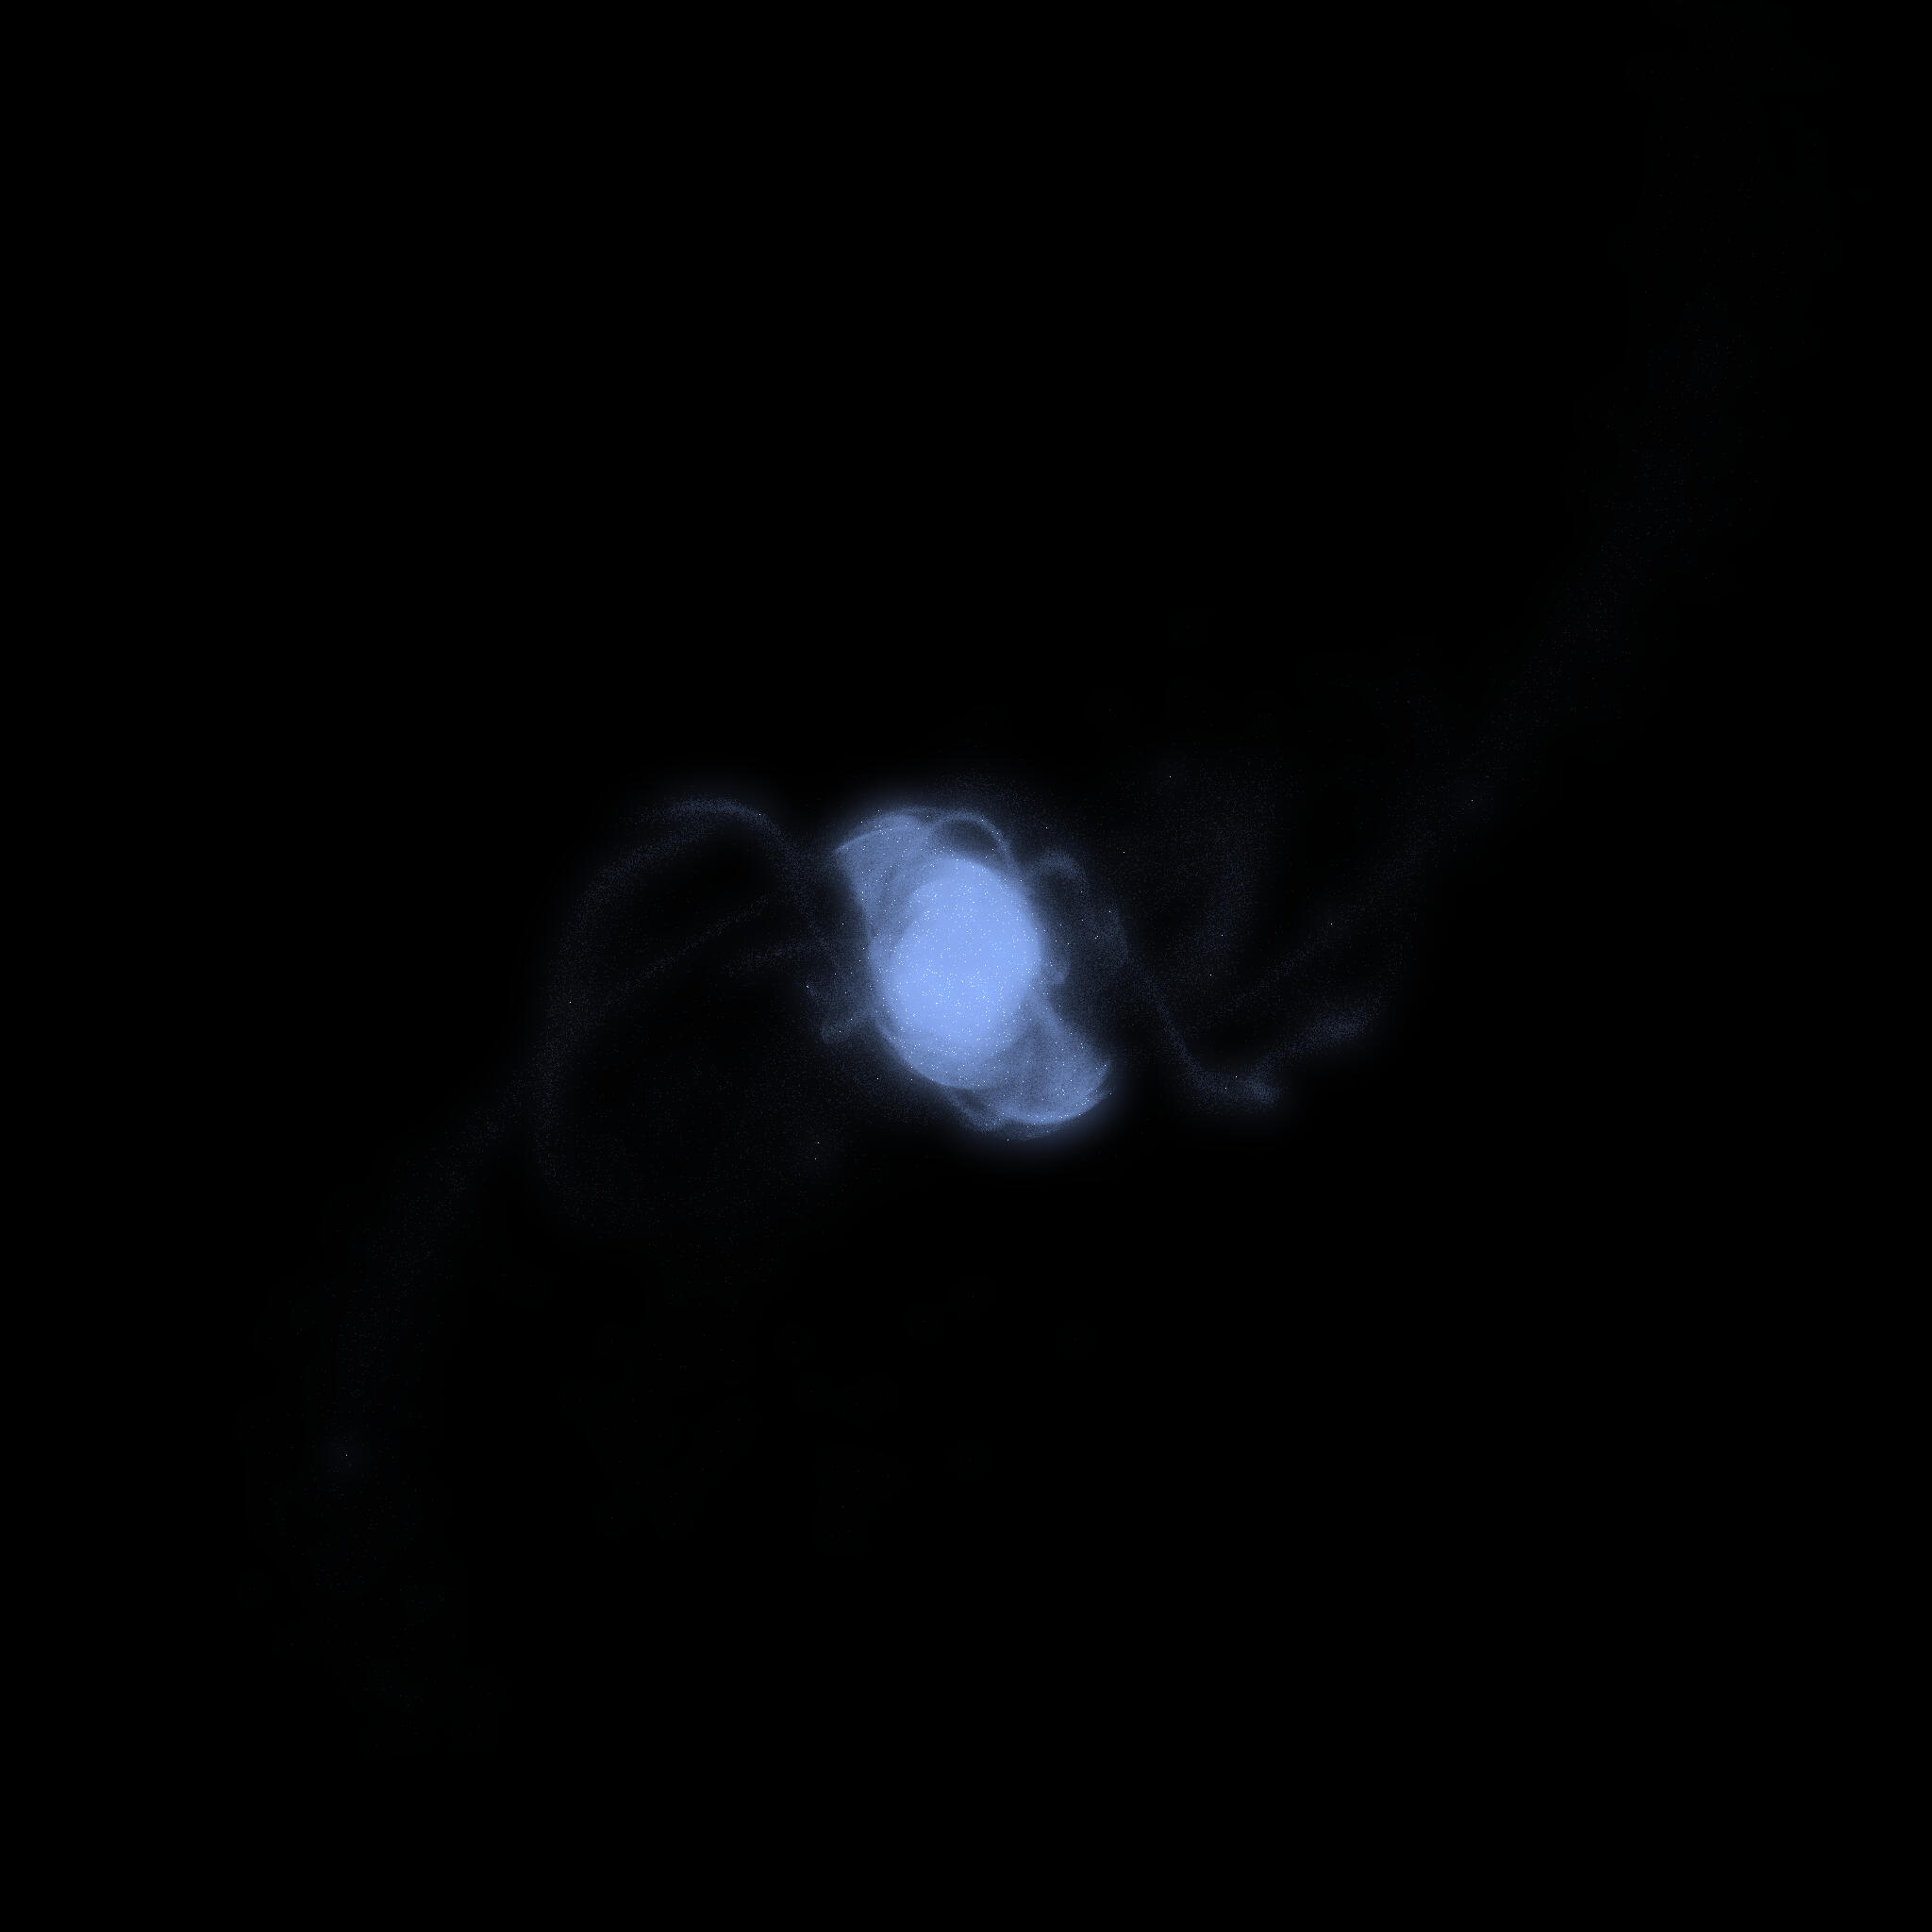

In [22]:
import IPython.display as display
i = 0
for image_features in parsed_image_dataset:
  image_raw = image_features['image/encoded'].numpy()
  display.display(display.Image(data=image_raw))
  i = i + 1
  if i > 10: 
    break
#   print(image_raw.shape)
